In [1]:
# !pip install xgboost


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from skimpy import skim
from IPython.display import display
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Cleaned_LoanApproval.csv')
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
#Removing Extra Space in the column
df['term'] = df['term'].str.strip()

In [5]:
# We will drop rows which have loan_status other than Fully Paid and Charged Off

df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [6]:
#Changing Infinite values in these two columns into finite values for further calculation

max_finite_value = df['DTI Ratio %'][~df['DTI Ratio %'].isin([np.inf, -np.inf])].max()
df['DTI Ratio %'].replace([np.inf, -np.inf], max_finite_value, inplace=True)

max_finite_value1 = df['payment_to_income_ratio (%)'][~df['payment_to_income_ratio (%)'].isin([np.inf, -np.inf])].max()
df['payment_to_income_ratio (%)'].replace([np.inf, -np.inf], max_finite_value1, inplace=True)

In [7]:
# Rename the 'term' column to 'term (months)'
df.rename(columns={'term': 'term (months)'}, inplace=True)

# Remove 'months' from the values in the 'term (months)' column
df['term (months)'] = df['term (months)'].str.replace(' months', '')

# Convert the 'term (months)' column to integer type
df['term (months)'] = df['term (months)'].astype(int)


In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 1220856 │ │ string      │ 16    │                                                         │
│ │ Number of columns │ 36      │ │ float64     │ 11    │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 9     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id       │  0 │    0 │ 57960000 │ 37480000 │    55720 │ 24040000 │ 59180000 │ 85460000 │ 14560000 │ ▇▅▇▆▃▂ │  │
│ │          │    │      │          │          │          │          │          │          │        0 │        │  │
│ │ loan_amn │  0 │    0 │    14710 │     8766 │     1000 │     8000 │    12500 │    20000 │    40000 │ ▆▇▇▃▂▁ │  │
│ │ t        │    │      │          │          │          │          │          │          │          │        │  │
│ │ term     │  0 │    0 │    41.91 │    10.34 │       36 │       36 │       36 │       36 │       60 │ ▇    ▃ │  │
│ │ (months) │    │      │          │          │          │          │          │          │          │        │  │
│ │ int_rate │  0 │    0 │    13.28 │    4.797 │     5.31 │     9.75 │    12.74 │    16.02 │    30.99 │ ▆▇▆▂▁  │  │
│ │ installm │  0 │    0 │    446.7 │    263.2 │     4.93 │    255.3 │    382.6 │    593.1 │     1720 │  ▆▇▃▁  │  │
│ │ ent      │    │      │          │          │          │          │          │          │          │        │  │
│ │ annual_i │  0 │    0 │    78210 │    71400 │        0 │    48000 │    65040 │    93000 │ 11000000 │   ▇    │  │
│ │ nc       │    │      │          │          │          │          │          │          │          │        │  │
│ │ DTI      │  0 │    0 │     25.2 │     4728 │ 0.006912 │    4.613 │    7.162 │    10.42 │  1321000 │   ▇    │  │
│ │ Ratio %  │    │      │          │          │          │          │          │          │          │        │  │
│ │ fico_ran │  0 │    0 │    695.5 │    31.32 │      660 │      670 │      690 │      710 │      845 │  ▇▃▁▁  │  │
│ │ ge_low   │    │      │          │          │          │          │          │          │          │        │  │
│ │ fico_ran │  0 │    0 │    699.5 │    31.32 │      664 │      674 │      694 │      714 │      850 │  ▇▃▁▁  │  │
│ │ ge_high  │    │      │          │          │          │          │          │          │          │        │  │
│ │ inq_last │  0 │    0 │    0.649 │   0.9336 │        0 │        0 │        0 │        1 │        8 │   ▇▁   │  │
│ │ _6mths   │    │      │          │          │          │          │          │          │          │        │  │
│ │ open_acc │  0 │    0 │    11.76 │    5.511 │        0 │        8 │       11 │       15 │       90 │   ▇▃   │  │
│ │ pub_rec  │  0 │    0 │   0.2149 │   0.6063 │        

In [9]:
df.describe()

,id,loan_amnt,term (months),int_rate,installment,annual_inc,DTI Ratio %,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,credit_score_range,monthly_income,payment_to_income_ratio (%)
count,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06,1.220856e+06
mean,5.795842e+07,1.471086e+04,4.190531e+01,1.327529e+01,4.467441e+02,7.821050e+04,2.519764e+01,6.954547e+02,6.994548e+02,6.489717e-01,1.175855e+01,2.149287e-01,1.654201e+04,7.237641e+04,2.517948e+01,1.663102e+00,1.327642e-01,4.000131e+00,6.517542e+03,2.519764e+01
std,3.748426e+07,8.766000e+03,1.033706e+01,4.796969e+00,2.632011e+02,7.140420e+04,4.727942e+03,3.132410e+01,3.132473e+01,9.336079e-01,5.510520e+00,6.062652e-01,2.276243e+04,9.593677e+04,1.202408e+01,1.996106e+00,3.768043e-01,1.144721e-02,5.950350e+03,4.727942e+03
min,5.571600e+04,1.000000e+03,3.600000e+01,5.310000e+00,4.930000e+00,0.000000e+00,6.912000e-03,6.600000e+02,6.640000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,6.912000e-03
25%,2.404468e+07,8.000000e+03,3.600000e+01,9.750000e+00,2.552800e+02,4.800000e+04,4.612500e+00,6.700000e+02,6.740000e+02,0.000000e+00,8.000000e+00,0.000000e+00,6.105750e+03,2.773182e+04,1.600000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.000000e+03,4.612500e+00
50%,5.917923e+07,1.250000e+04,3.600000e+01,1.274000e+01,3.826200e+02,6.504000e+04,7.161600e+00,6.900000e+02,6.940000e+02,0.000000e+00,1.100000e+01,0.000000e+00,1.134600e+04,5.131111e+04,2.300000e+01,1.000000e+00,0.000000e+00,4.000000e+00,5.420000e+03,7.161600e+00
75%,8.546018e+07,2.000000e+04,3.600000e+01,1.602000e+01,5.930600e+02,9.300000e+04,1.042200e+01,7.100000e+02,7.140000e+02,1.000000e+00,1.500000e+01,0.000000e+00,2.006500e+04,8.818762e+04,3.200000e+01,3.000000e+00,0.000000e+00,4.000000e+00,7.750000e+03,1.042200e+01
max,1.456364e+08,4.000000e+04,6.000000e+01,3.099000e+01,1.719830e+03,1.099920e+07,1.320792e+06,8.450000e+02,8.500000e+02,8.000000e+00,9.000000e+01,8.600000e+01,2.904836e+06,1.708727e+07,1.760000e+02,5.100000e+01,1.200000e+01,5.000000e+00,9.166000e+05,1.320792e+06


In [10]:
display(df.head())

,id,loan_amnt,term (months),int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,credit_score_bucket,credit_score_range,monthly_income,payment_to_income_ratio (%)
0,68407277,3600.0,36,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,...,21269.230769,13,Whole Funded,Individual,1.0,0.0,Good,4,4583.333333,2.684291
1,68355089,24700.0,36,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,...,56500.000000,38,Whole Funded,Individual,4.0,0.0,Good,4,5416.666667,15.143631
2,68341763,20000.0,60,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,...,43716.666667,18,Whole Funded,Joint App,5.0,0.0,Good,4,5250.000000,8.241143
4,68476807,10400.0,60,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,...,62654.285714,35,Whole Funded,Individual,6.0,0.0,Good,4,8702.750000,3.331246
5,68426831,11950.0,36,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,...,147033.333333,6,Whole Funded,Individual,0.0,0.0,Good,4,2833.333333,14.300471


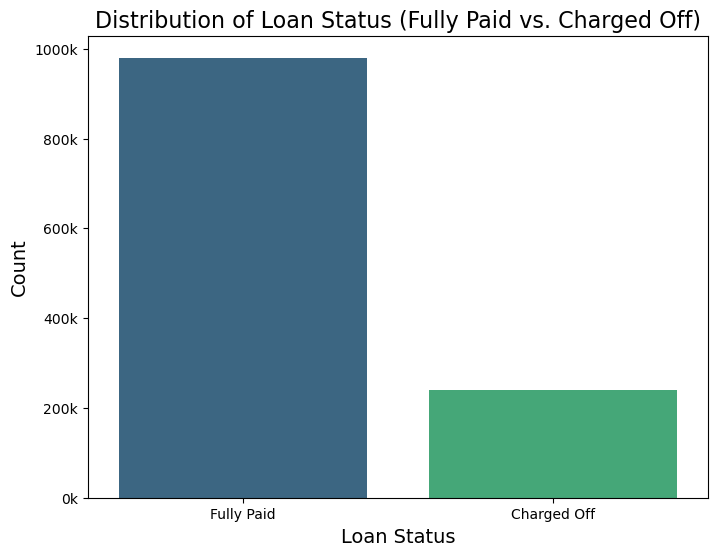

In [11]:
# Filtering the DataFrame for 'Fully Paid' and 'Charged Off' loan statuses
filtered_df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

#countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_status', data=filtered_df, palette='viridis')

#labels and title
plt.title("Distribution of Loan Status (Fully Paid vs. Charged Off)", fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Format y-axis labels in thousands
ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])

plt.show()

In [12]:
#Create dummies for loan_status so that correlation can be calculated wrt to loan_status for other continuous features.

df_temp = df.copy() # copy so that it does not affect the original data frame
df_temp['loan_status'] = pd.get_dummies(df_temp['loan_status'], drop_first=True)

In [13]:
non_numeric_columns = df_temp.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type', 'credit_score_bucket']


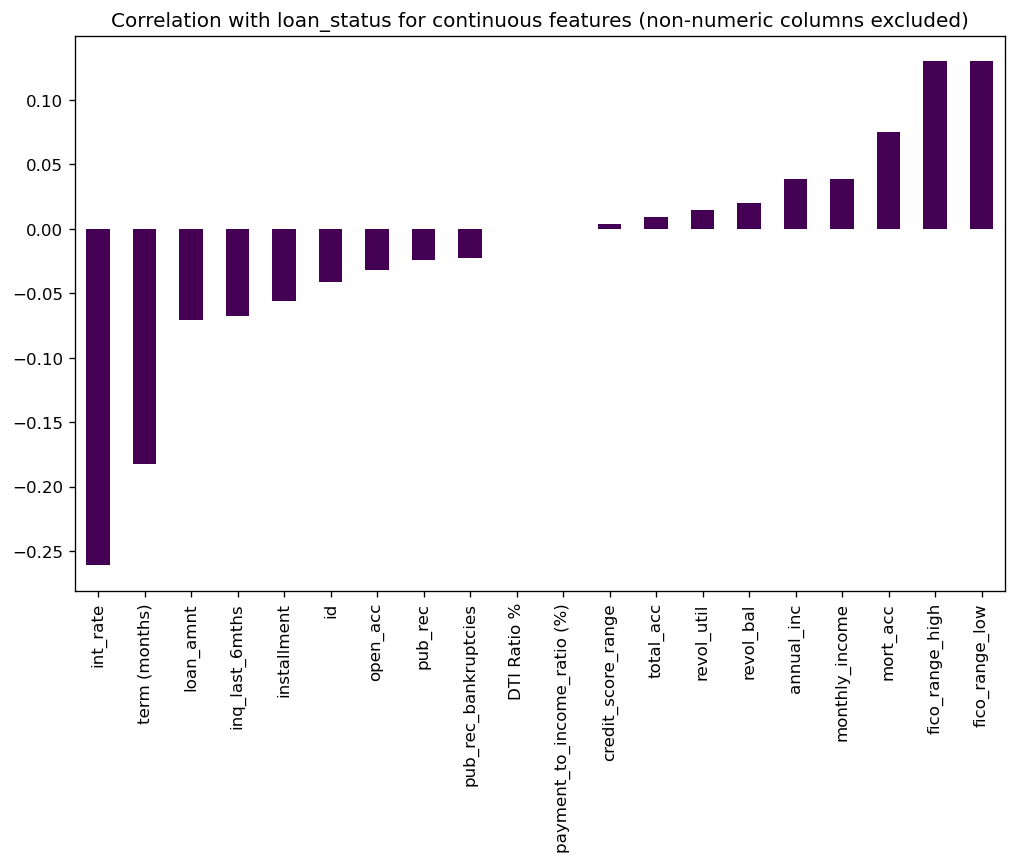

In [14]:
non_numeric_columns = ['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type', 'credit_score_bucket']

# Filter out non-numeric columns
numeric_columns = df_temp.drop(columns=non_numeric_columns)

# Calculate the correlation
correlation = numeric_columns.corr()['loan_status']

# Plot the correlations
plt.figure(figsize=(10, 6), dpi=120)
correlation.sort_values().drop('loan_status').plot(kind='bar', cmap='viridis')
plt.title('Correlation with loan_status for continuous features (non-numeric columns excluded)')
plt.xticks(rotation=90)
plt.show()


#int_rate, fico_range_high and fico_range_low are highly correlated with loan_status compared to other features.

In [15]:
#This is a categorical feature which needs to be converted into dummies.
add_state_dummies = pd.get_dummies(df['addr_state'], drop_first=True) # drop_first will drop the first dummy column 
add_state_dummies

,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065092,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2065094,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2065095,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2065096,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#Drop 'addr_state' feature and concat 'add_state_dummies' to df.

df = pd.concat([df.drop('addr_state', axis=1), add_state_dummies], axis=1)

<Axes: ylabel='Density'>

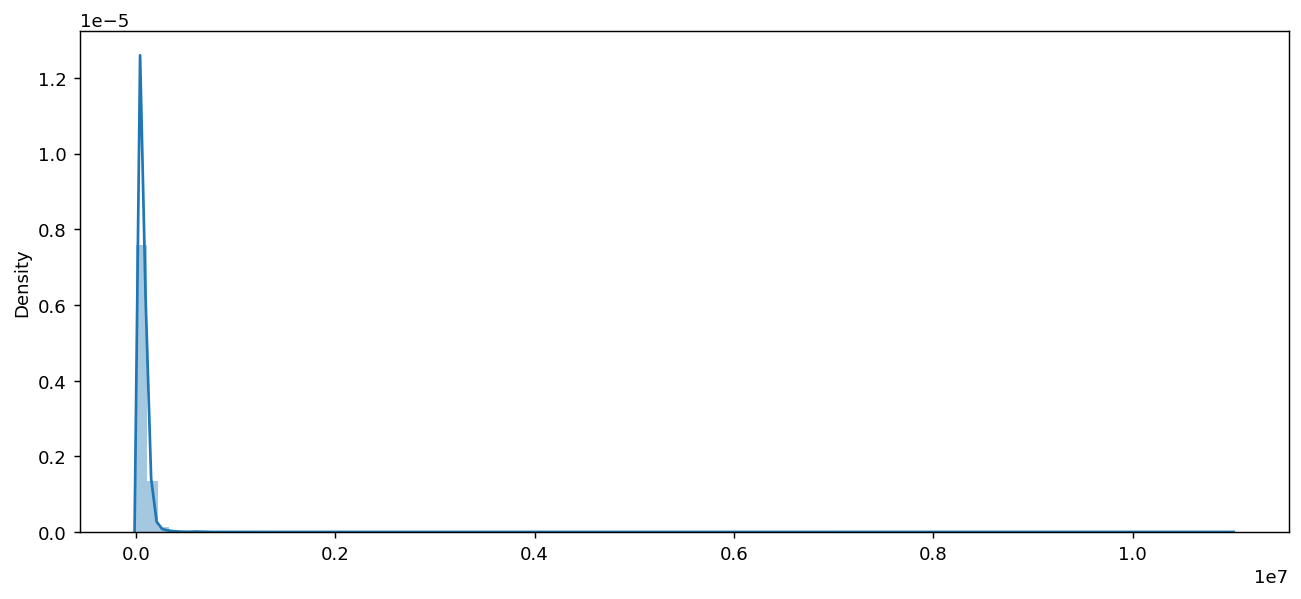

In [17]:
#Plot the distribution of annual incomes

plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc'], bins=100)

The salary distribution is highly skewed towards right. Let's find how many customers have annual_inc higher than $250k

In [18]:
len(df[df['annual_inc'] > 250000])

12980

In [19]:
#% of rows with annual income > $250000.

percent_of_rows_of_customers_with_annual_inc_more_than_250000 = 13447*100/len(df) 
percent_of_rows_of_customers_with_annual_inc_more_than_250000

1.1014403009036282

Since these are outliers, let's drop these rows.

In [20]:
df = df[df['annual_inc'] <= 250000]

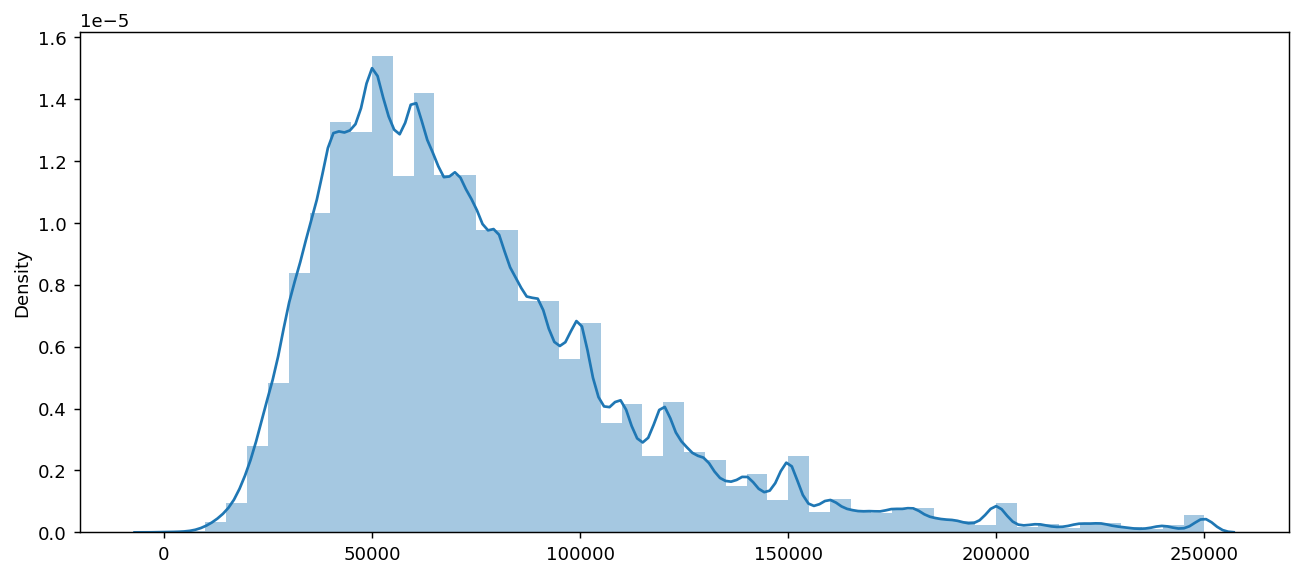

In [21]:
#Let's check the distribution now

plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=df['annual_inc']);

Despite some remaining skewness, the distribution has notably improved. We will now examine the annual income distributions for two distinct groups: customers who fully paid off their loans and customers whose loans were charged off.

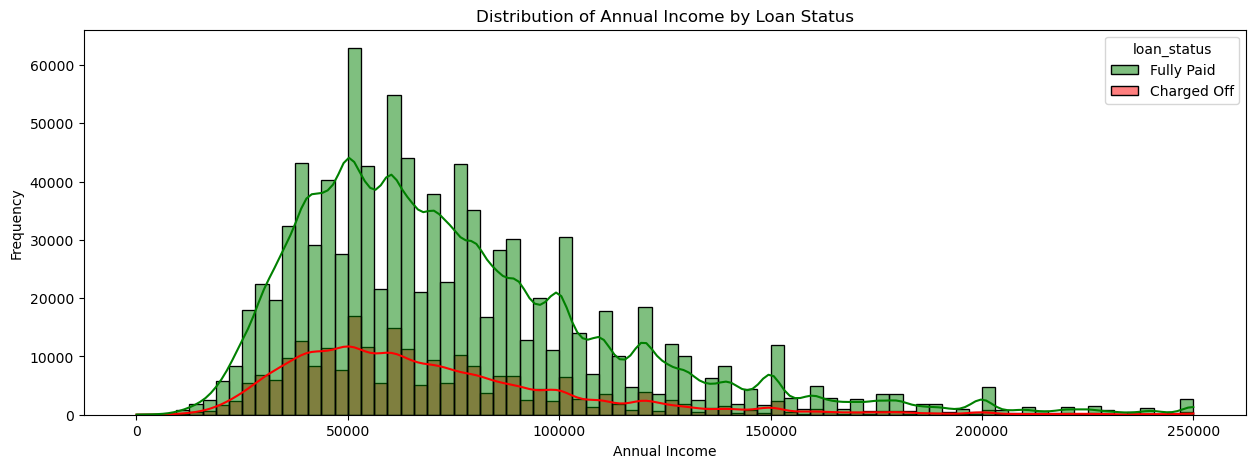

In [22]:
# custom color palette with distinct colors for loan statuses
custom_palette = {'Fully Paid': 'green', 'Charged Off': 'red'}

# Creating a displot
plt.figure(figsize=(15, 5))  

# distribution of annual income 
sns.histplot(data=df, x='annual_inc', hue='loan_status', bins=80, kde=True, palette=custom_palette)

# labels and title
plt.xlabel('Annual Income')  
plt.ylabel('Frequency') 
plt.title('Distribution of Annual Income by Loan Status')

plt.show()

In [23]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,239140.0,70193.183966,36209.216901,0.0,45000.0,61800.0,85000.0,250000.0
Fully Paid,968736.0,75659.865622,39106.757737,0.0,48000.0,67000.0,94000.0,250000.0


The mean annual_inc for customers who fully paid the loan and who did not differs by around $5500.

In [24]:
#earliest_cr_line

df['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
4    Jun-1998
5    Oct-1987
Name: earliest_cr_line, dtype: object

In [25]:
#Lets remove the month and just keep the year as integer.

df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))
df['earliest_cr_line'].head()

0    2003
1    1999
2    2000
4    1998
5    1987
Name: earliest_cr_line, dtype: int64

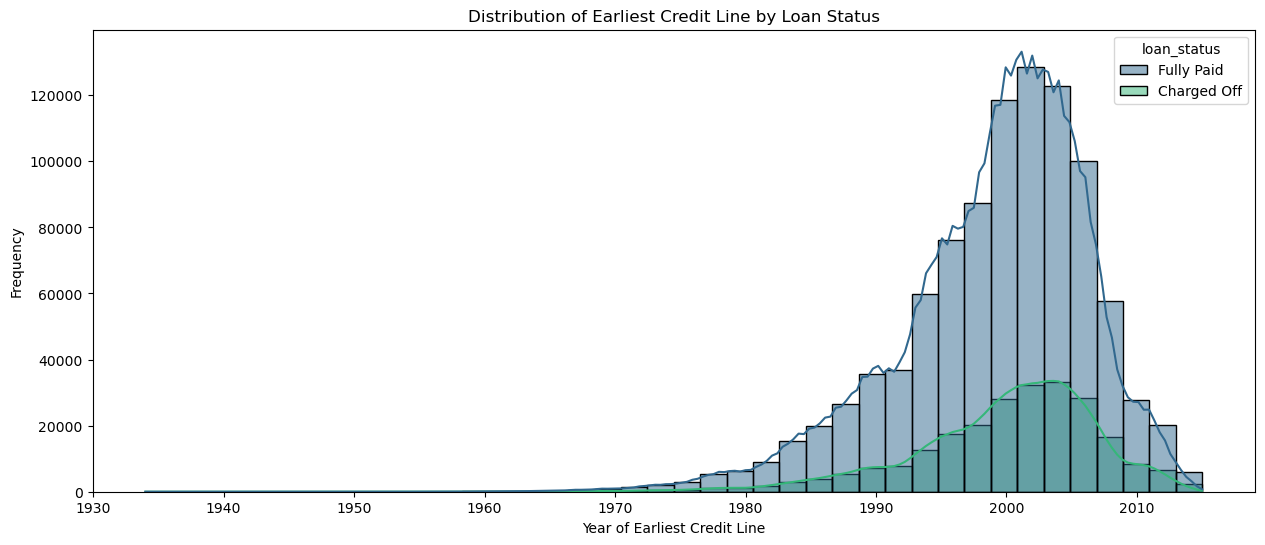

In [26]:
#Checking distribution of earliest_cr_line of customers who Fully Paid the loan and customers who did not.

plt.figure(figsize=(15, 6)) 

# Plot the distribution of 'earliest_cr_line' by year with loan status differentiation
sns.histplot(data=df, x='earliest_cr_line', hue='loan_status', bins=40, kde=True, palette='viridis')

plt.xlabel('Year of Earliest Credit Line') 
plt.ylabel('Frequency')  
plt.title('Distribution of Earliest Credit Line by Loan Status')  

plt.show()

In [27]:
df.groupby('loan_status')['earliest_cr_line'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,239140.0,1999.824860,7.179020,1944.0,1996.0,2001.0,2005.0,2015.0
Fully Paid,968736.0,1998.922417,7.331401,1934.0,1995.0,2000.0,2004.0,2015.0


Mean earliest_cr_line for customers who fully paid the loan was approx. 1 year before the customers who did not pay the loan

In [28]:
#emp_length
df['emp_length'].head()

0    10+ years
1    10+ years
2    10+ years
4      3 years
5      4 years
Name: emp_length, dtype: object

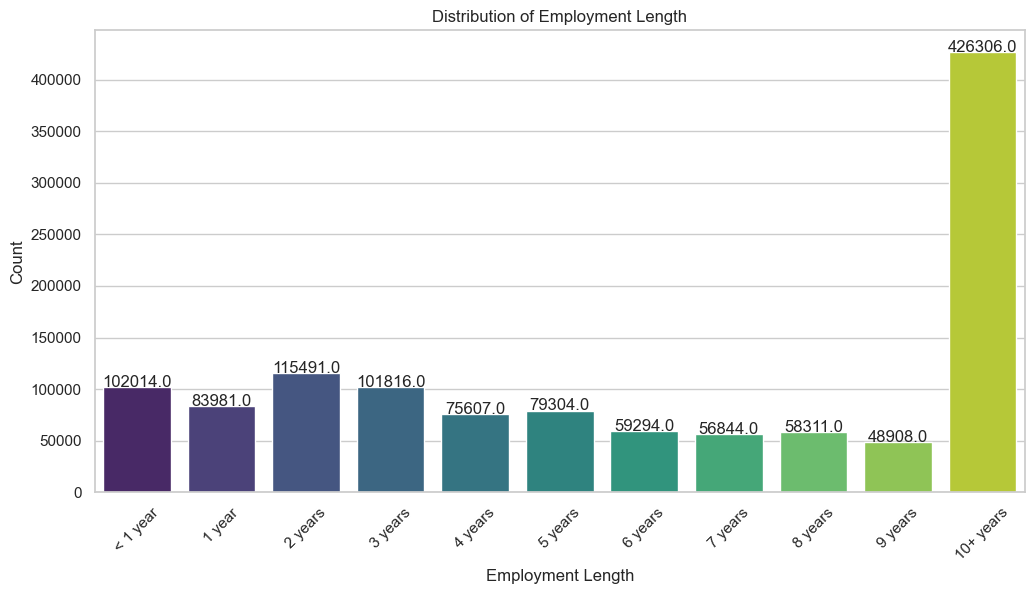

In [29]:
#Creating  ascending order list
emp_length_order = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
    '6 years', '7 years', '8 years', '9 years', '10+ years'
]

color_palette = sns.color_palette("viridis", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='emp_length', data=df, order=emp_length_order, palette=color_palette)

plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')

# Rotating the x-axis labels 
plt.xticks(rotation=45)

# We need to annotate the bars with their counts
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center')

plt.show()

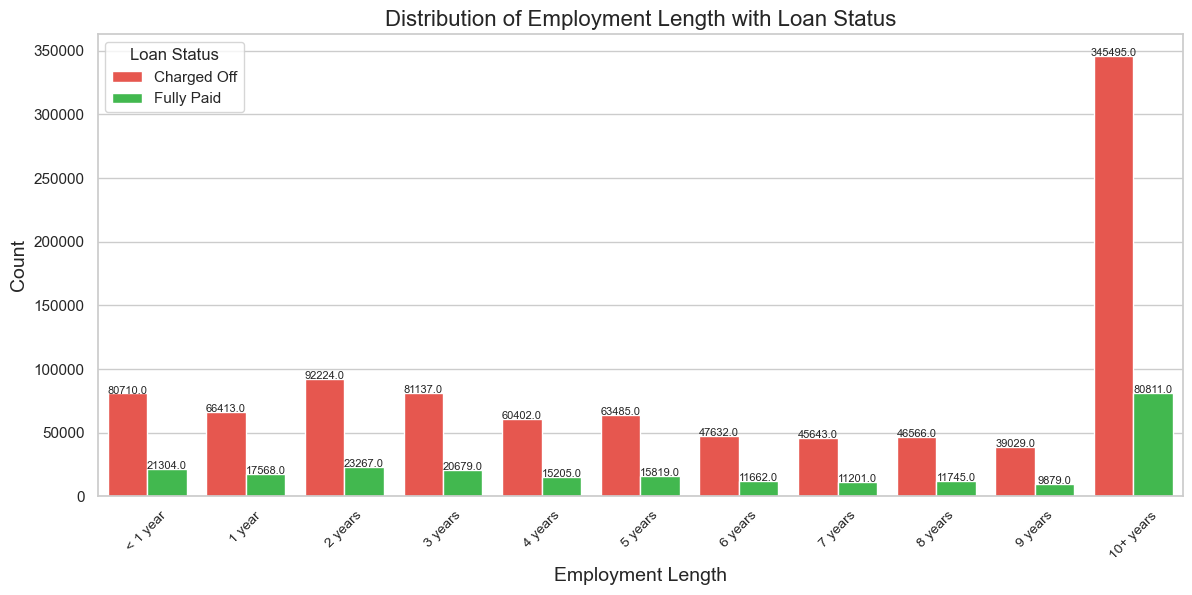

In [30]:
colors = ['#FF4136', '#2ECC40']  # Red and green colors

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status', palette=colors)

plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Employment Length with Loan Status', fontsize=16)

plt.xticks(rotation=45, fontsize=10)  

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center', fontsize=8)

plt.legend(title='Loan Status', labels=['Charged Off', 'Fully Paid'], loc='upper left')

plt.show()

This still doesn't clarify whether there exists a connection between employment length and loan charge-offs. Therefore, let's calculate the percentage of customers who faced loan charge-offs annually.

In [31]:
emp_charged_off = df[df['loan_status'] == "Charged Off"].groupby("emp_length").size()
emp_fully_paid = df[df['loan_status'] == "Fully Paid"].groupby("emp_length").size()
percentage_charged_off = (emp_charged_off * 100) / (emp_charged_off + emp_fully_paid)

result_df = pd.DataFrame({'Employment Length': percentage_charged_off.index, 'Percentage Charged Off': percentage_charged_off.values})
result_df.reset_index(drop=True, inplace=True)  # Reset the index without creating a new column
display(result_df)

,Employment Length,Percentage Charged Off
0,1 year,20.919017
1,10+ years,18.956102
2,2 years,20.146159
3,3 years,20.310167
4,4 years,20.110572
5,5 years,19.947291
6,6 years,19.668095
7,7 years,19.704806
8,8 years,20.141997
9,9 years,20.199149


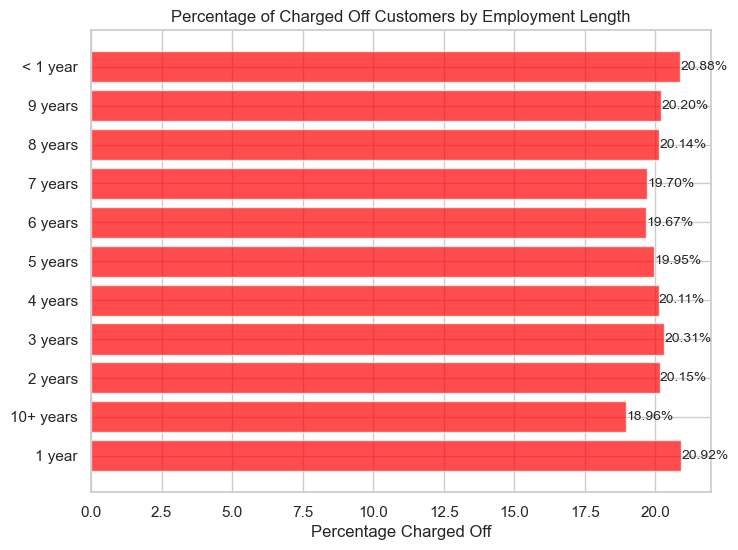

In [32]:
plt.figure(figsize=(8, 6), dpi=100)

categories = percentage_charged_off.index
values = percentage_charged_off.values

plt.barh(categories, values, color='red', alpha=0.7)

# Annotations
for i, percentage in enumerate(values):
    plt.text(percentage, i, f'{percentage:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage Charged Off')
plt.title('Percentage of Charged Off Customers by Employment Length', fontsize=12)

plt.show()


There isn't a substantial difference. This particular feature won't significantly impact our training and predictions. Therefore, it's advisable to remove this feature.

In [33]:
df = df.drop('emp_length', axis=1)

In [34]:
df.columns

Index(['id', 'loan_amnt', 'term (months)', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'DTI Ratio %', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'credit_score_bucket',
       'credit_score_range', 'monthly_income', 'payment_to_income_ratio (%)',
       'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY'],
      dtype='object')

In [35]:
#emp_title
df['emp_title'].describe()

count     1207876
unique     349823
top       Teacher
freq        21253
Name: emp_title, dtype: object

There are 378007 unique values, way too many to create dummies. Hence, it is wise to drop this feature.

In [36]:
df = df.drop('emp_title', axis=1)

In [37]:
#fico_range_high and fico_range_low

df['fico_range_high'].describe()

count    1.207876e+06
mean     6.993224e+02
std      3.124611e+01
min      6.640000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64

In [38]:
df['fico_range_low'].describe()

count    1.207876e+06
mean     6.953222e+02
std      3.124549e+01
min      6.600000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64

Both fico_range_high and fico_range_low exhibit comparable averages and standard deviations. Therefore, we will utilize the average of both scores.

In [39]:
df['fico'] = (df['fico_range_high'] + df['fico_range_low']) / 2
df['fico']

0          677.0
1          717.0
2          697.0
4          697.0
5          692.0
           ...  
2065092    737.0
2065094    707.0
2065095    737.0
2065096    667.0
2065101    662.0
Name: fico, Length: 1207876, dtype: float64

In [40]:
df = df.drop(['fico_range_high', 'fico_range_low'], axis=1)
df.shape

(1207876, 82)

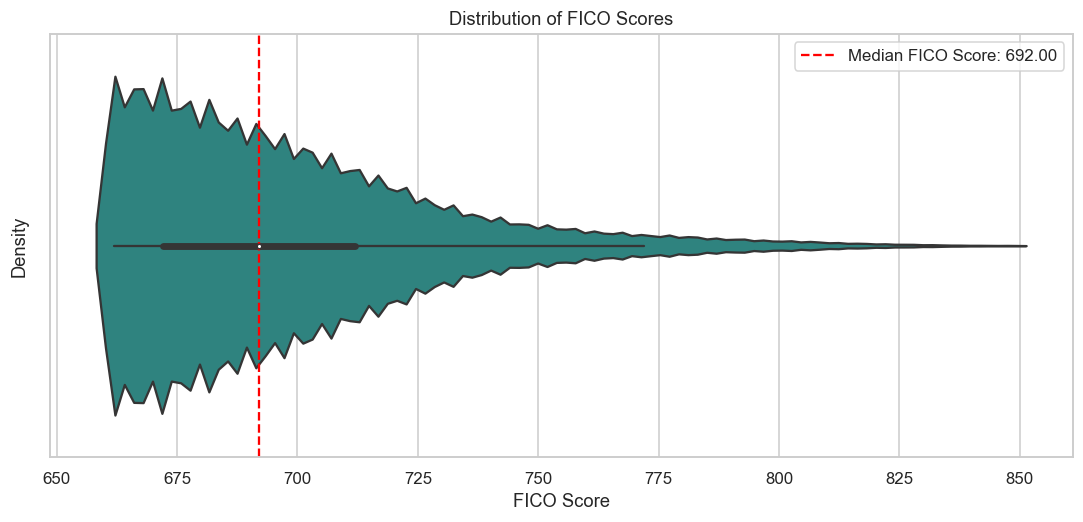

In [41]:
plt.figure(figsize=(12, 5), dpi=110)
sns.violinplot(x=df['fico'], palette='viridis')
plt.xlabel('FICO Score')
plt.ylabel('Density')
plt.title('Distribution of FICO Scores')

#annotations
median_fico = df['fico'].median()
plt.axvline(median_fico, color='red', linestyle='--', label=f'Median FICO Score: {median_fico:.2f}')
plt.legend()

plt.show()


Check distribution of fico score of customers who Fully Paid the loan and customers who did not.

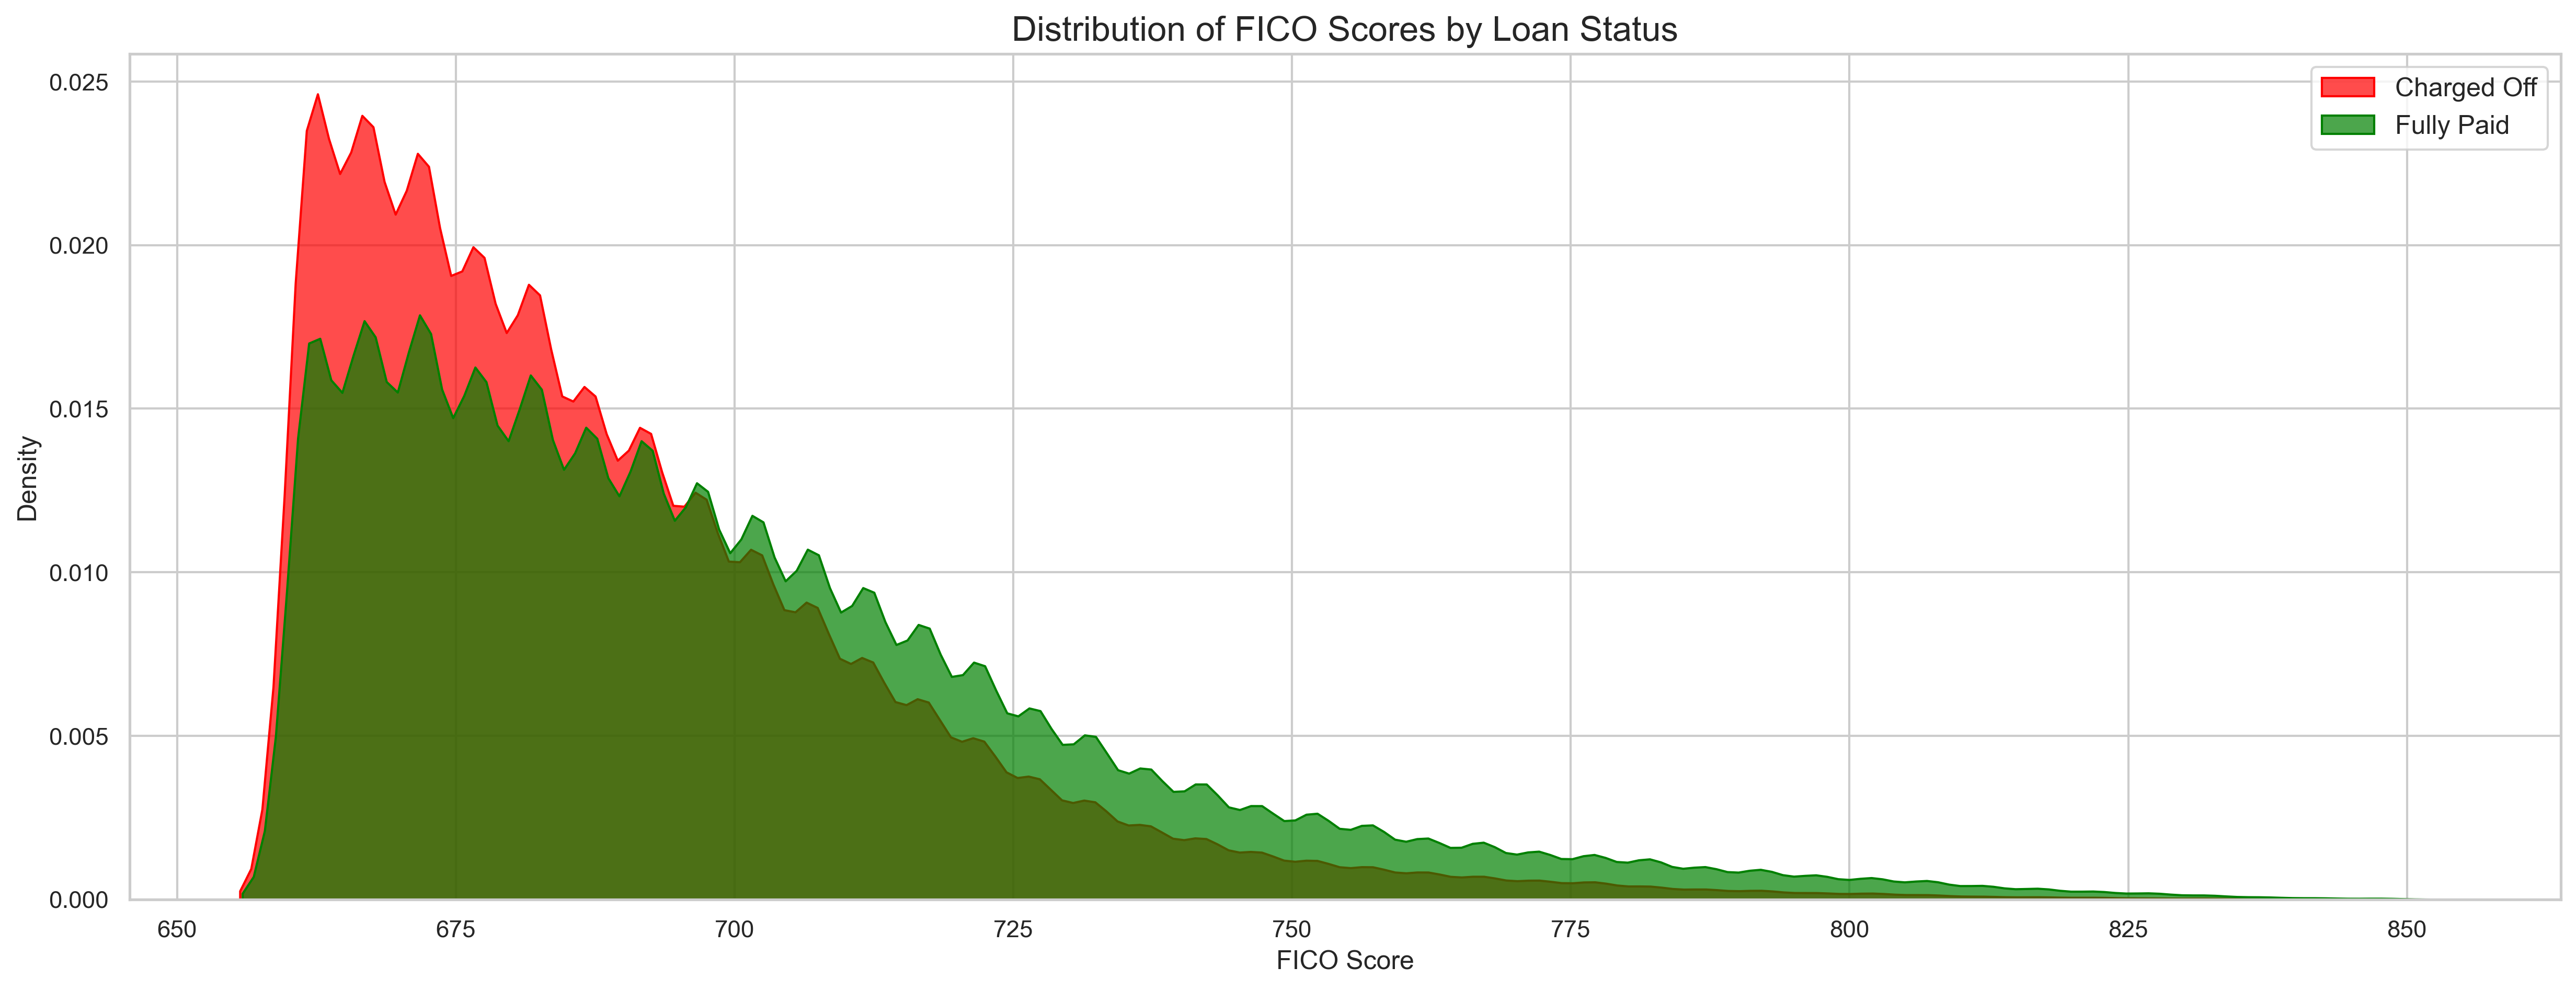

In [42]:
plt.figure(figsize=(20, 7), dpi=300)

# Filter the DataFrame for Charged Off and Fully Paid loans
charged_off = df[df['loan_status'] == 'Charged Off']
fully_paid = df[df['loan_status'] == 'Fully Paid']

colors = {'Charged Off': 'red', 'Fully Paid': 'green'}

# Plot KDE plots for FICO scores with different loan statuses
for status, data in [('Charged Off', charged_off), ('Fully Paid', fully_paid)]:
    sns.kdeplot(data=data, x='fico', label=status, shade=True, color=colors[status], alpha=0.7)

plt.xlabel('FICO Score')
plt.ylabel('Density')
plt.title('Distribution of FICO Scores by Loan Status', fontsize=16)

plt.legend(fontsize=12)

plt.show()


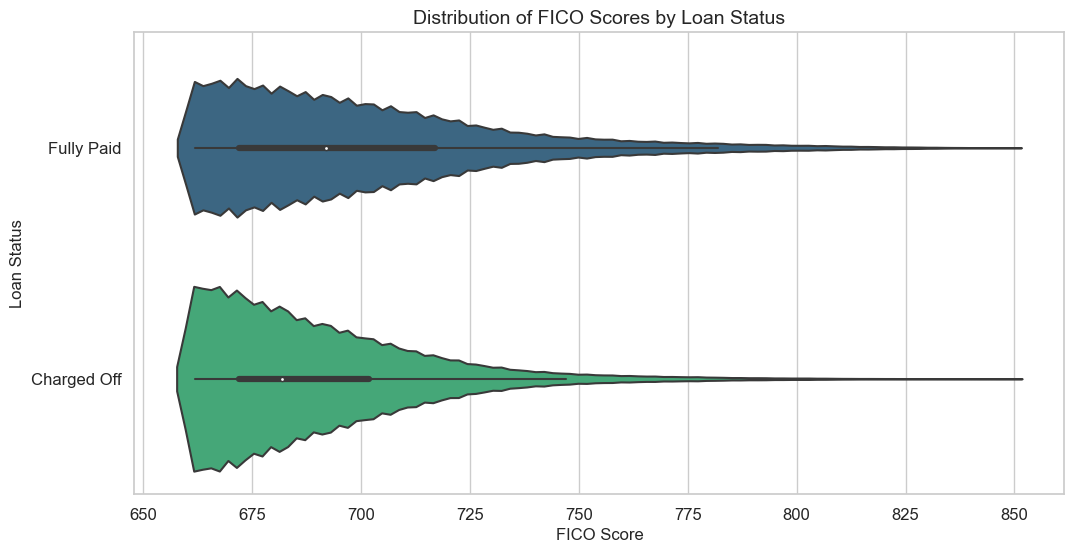

In [43]:
plt.figure(figsize=(12, 6), dpi=100)

sns.violinplot(data=df, y='loan_status', x='fico', palette='viridis')

plt.title('Distribution of FICO Scores by Loan Status', fontsize=14)

plt.xlabel('FICO Score')
plt.ylabel('Loan Status')

sns.set_style('whitegrid') 
plt.xticks(fontsize=12)     
plt.yticks(fontsize=12)     

plt.show()

In [44]:
df.groupby('loan_status')['fico'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,239140.0,689.197271,25.265106,662.0,672.0,682.0,702.0,847.5
Fully Paid,968736.0,699.328025,32.239925,662.0,672.0,692.0,717.0,847.5


There exists a distinction in the FICO credit scores between customers who have fully repaid their loans and those who have not, as observed in the data.

In [45]:
#grade and sub_grade

sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [46]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Checking number of cutomers separated by grade and based on their loan_status.

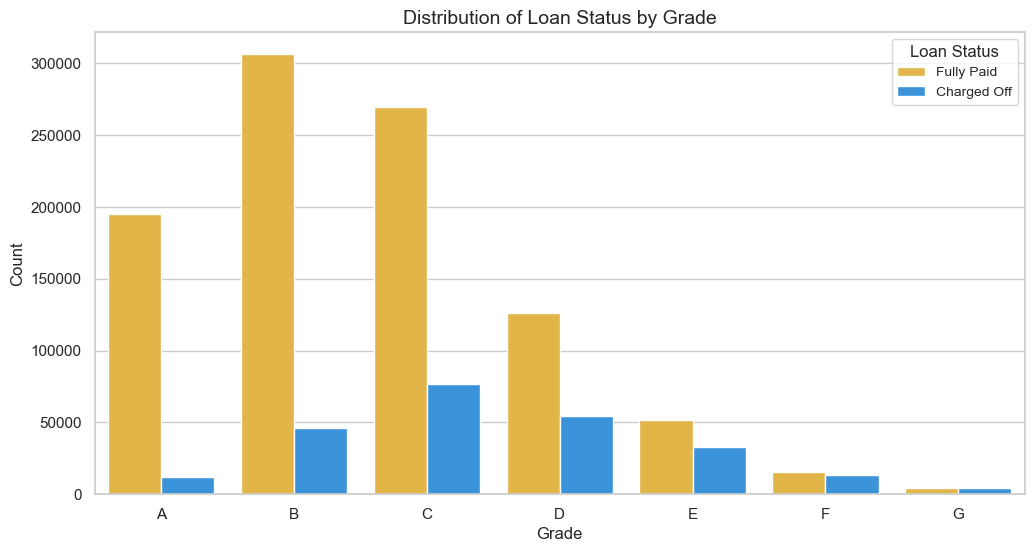

In [47]:
colors = ["#FBC02D", "#2196F3"]  # Yellow for Fully Paid, Blue for Charged Off
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(12, 6), dpi=100)

sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(df['grade'].unique()))

plt.xlabel('Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Loan Status by Grade', fontsize=14)

plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'], fontsize=10, title_fontsize=12)

plt.xticks(rotation=0)

plt.show()

<Axes: xlabel='sub_grade', ylabel='count'>

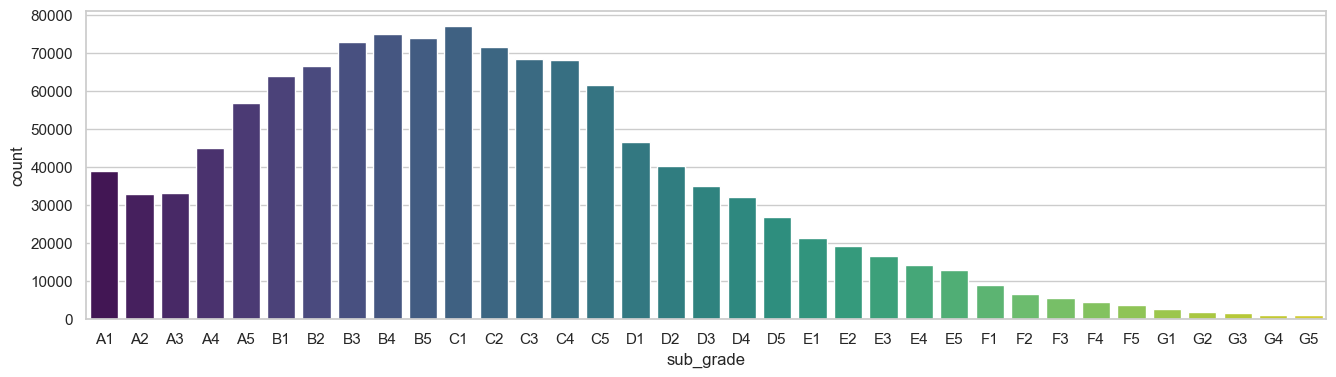

In [48]:
#number of customers in each sub_grade.
plt.figure(figsize=(16,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='viridis')

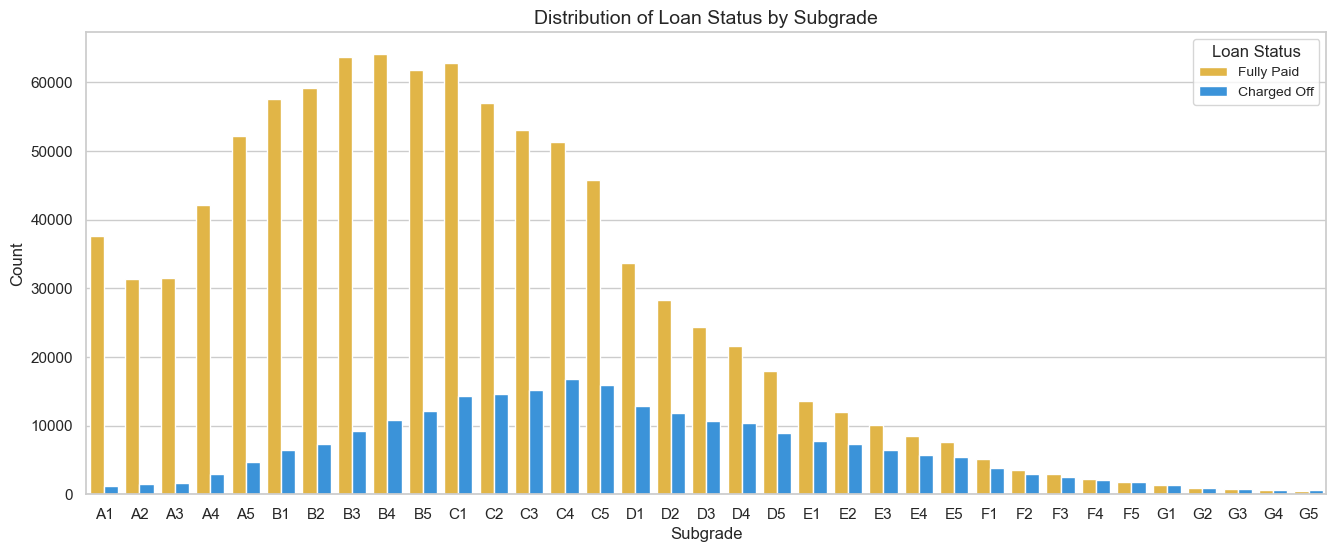

In [49]:
#number of customers in each sub_grade separated by loan_status

colors = ["#FBC02D", "#2196F3"]  # Yellow for Fully Paid, Blue for Charged Off
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(16, 6), dpi=100)

# Create a countplot with hue for loan_status
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=subgrade_order)

plt.xlabel('Subgrade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Loan Status by Subgrade', fontsize=14)

plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'], fontsize=10, title_fontsize=12)

plt.xticks(rotation=0)

plt.show()


We can safely remove the 'grade' feature since the information it contains is already captured within the more detailed 'sub_grade' feature. This simplification doesn't impact our analysis and makes the dataset cleaner.

In [50]:
df = df.drop('grade', axis=1)

In [51]:
#As sub_grade is categorical, lets create dummies for the same.

dummies_sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)

In [52]:
#Concat the 'dummies_sub_grade' after dropping the original feature 'sub_grade'.

df = pd.concat([df.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)
df.shape

(1207876, 114)

In [53]:
#home_ownership

df['home_ownership'].value_counts()

home_ownership
MORTGAGE    600256
RENT        482979
OWN         124290
ANY            266
NONE            43
OTHER           42
Name: count, dtype: int64

In [54]:
#Let's merge 'ANY' and 'NONE' into 'OTHER'.

df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

<Axes: xlabel='home_ownership', ylabel='count'>

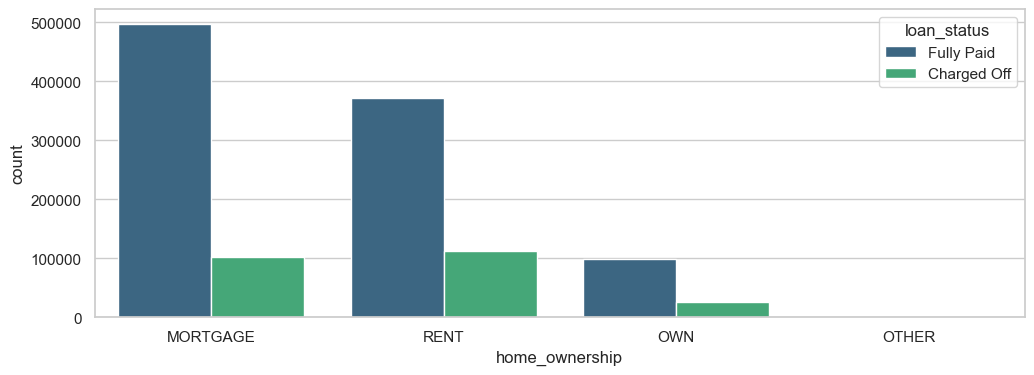

In [55]:
plt.figure(figsize=(12,4))
sns.countplot(x='home_ownership',data=df,hue='loan_status', palette='viridis')

In [56]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    600256
RENT        482979
OWN         124290
OTHER          351
Name: count, dtype: int64

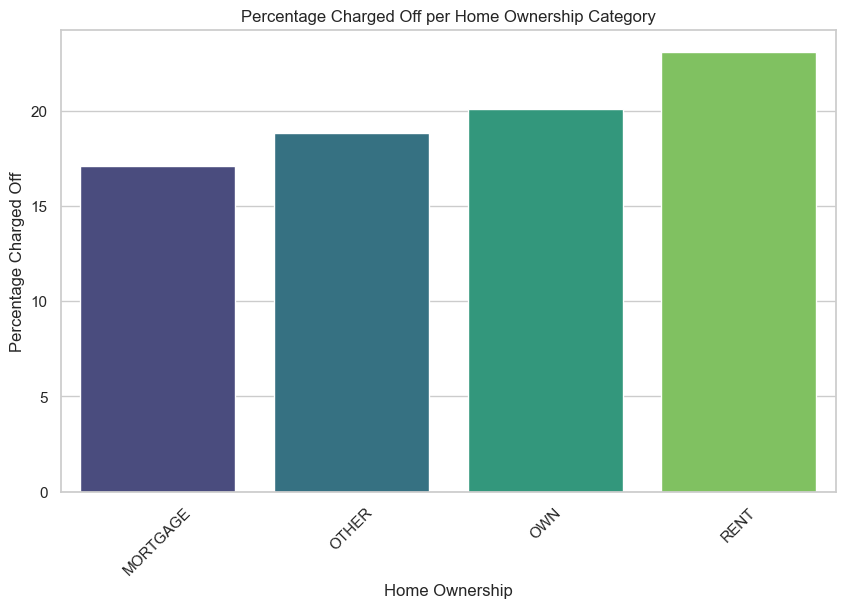

In [57]:
# Calculate the count of loan statuses for each home ownership category
charged_off = df[df['loan_status'] == "Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df[df['loan_status'] == "Fully Paid"].groupby("home_ownership").count()['loan_status']
percentage_charged_off = (charged_off * 100) / (charged_off + fully_paid)

plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_charged_off.index, y=percentage_charged_off.values, palette='viridis')
plt.title("Percentage Charged Off per Home Ownership Category")
plt.xlabel("Home Ownership")
plt.ylabel("Percentage Charged Off")
plt.xticks(rotation=45)

plt.show()

We observe noticeable distinctions among various home ownership categories. Given that there are only four unique categories within the "home_ownership" column, we will transform this categorical data into binary dummy variables for further analysis.

In [58]:
dummies_home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)

#Concat the 'dummies_home_ownership' after dropping the original feature 'home_ownership'
df = pd.concat([df.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)
df.shape

(1207876, 116)

In [59]:
#application_type

df['application_type'].value_counts()

application_type
Individual    1185899
Joint App       21977
Name: count, dtype: int64

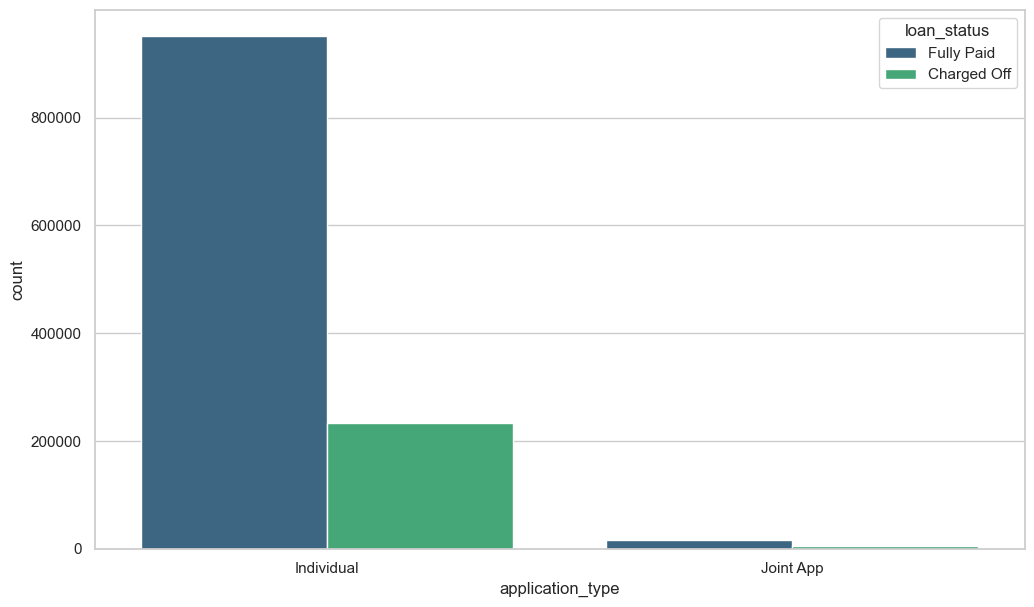

In [60]:
plt.figure(figsize=(12,7))
sns.countplot(x='application_type',data=df,hue='loan_status', palette='viridis');

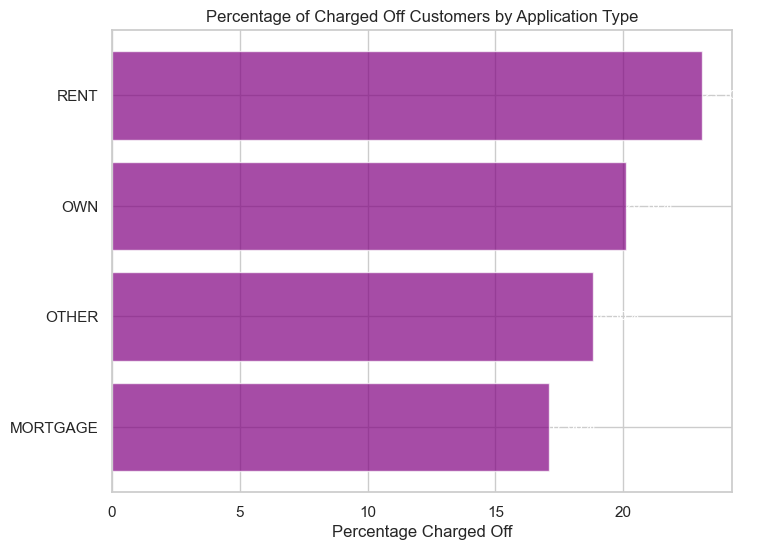

In [61]:
#Percentage charged off per application_type category.

plt.figure(figsize=(8, 6), dpi=100)

categories = percentage_charged_off.index
values = percentage_charged_off.values

plt.barh(categories, values, color='purple', alpha=0.7)

for i, percentage in enumerate(values):
    plt.text(percentage, i, f'{percentage:.2f}%', va='center', fontsize=10, color='white')

plt.xlabel('Percentage Charged Off')
plt.title('Percentage of Charged Off Customers by Application Type', fontsize=12)

plt.show()


Clear distinctions can be observed among various categories of home ownership. Since this particular feature is categorical, we will generate dummy variables to represent it. Additionally, we'll remove the original "application_type" feature and concatenate the newly created dummy variables in its place.

In [62]:
dummies_application_type = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df.drop('application_type', axis=1), dummies_application_type], axis=1)

In [63]:
# initial_list_status

df['initial_list_status'].value_counts()

initial_list_status
Whole Funded         728490
Fractional Funded    479386
Name: count, dtype: int64

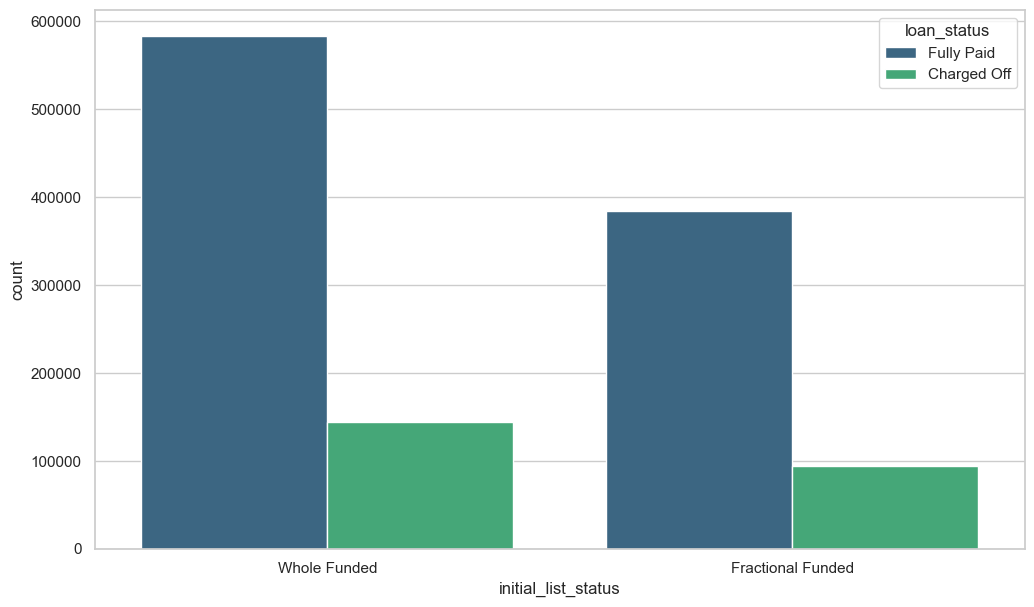

In [64]:
#Let's plot 'initial_list_status' for the two 'loan_status'.

plt.figure(figsize=(12,7))
sns.countplot(x='initial_list_status',data=df,hue='loan_status', palette='viridis');

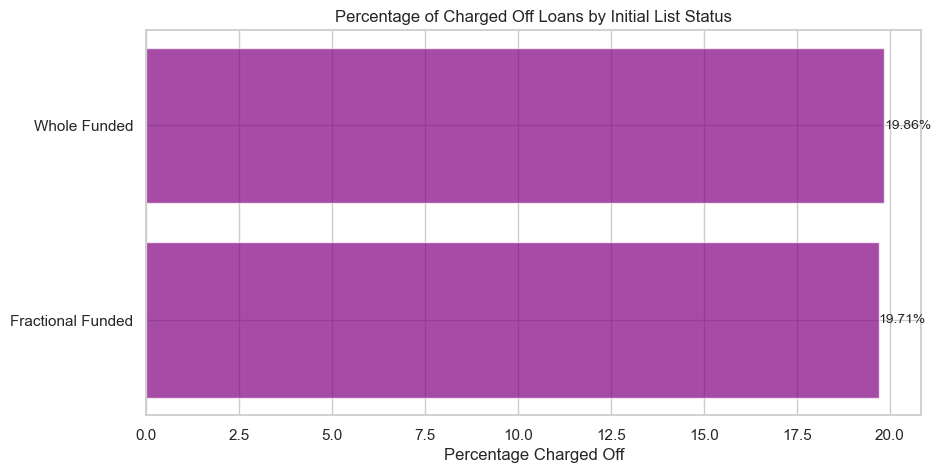

In [65]:
#Percentage charged off per initial_list_status category.
plt.figure(figsize=(10, 5), dpi=100)

charged_off = df[df['loan_status'] == "Charged Off"].groupby("initial_list_status").count()['loan_status']
fully_paid = df[df['loan_status'] == "Fully Paid"].groupby("initial_list_status").count()['loan_status']
percentage_charged_off = (charged_off * 100) / (charged_off + fully_paid)

# Create a horizontal bar chart
plt.barh(percentage_charged_off.index, percentage_charged_off.values, color='purple', alpha=0.7)

# Add annotations
for i, percentage in enumerate(percentage_charged_off.values):
    plt.text(percentage, i, f'{percentage:.2f}%', va='center', fontsize=10)

# Customize labels and title
plt.xlabel('Percentage Charged Off')
plt.title('Percentage of Charged Off Loans by Initial List Status', fontsize=12)

plt.show()


In [66]:
#Percentage charged off is almost same. Let's drop this feature.

df = df.drop('initial_list_status', axis=1)

In [67]:
#int_rate

df['int_rate'].describe()

count    1.207876e+06
mean     1.329076e+01
std      4.794189e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.279000e+01
75%      1.602000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

In [68]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,239140.0,15.811629,4.925325,5.31,12.49,15.22,18.84,30.99
Fully Paid,968736.0,12.668461,4.551225,5.31,9.17,12.29,15.31,30.99


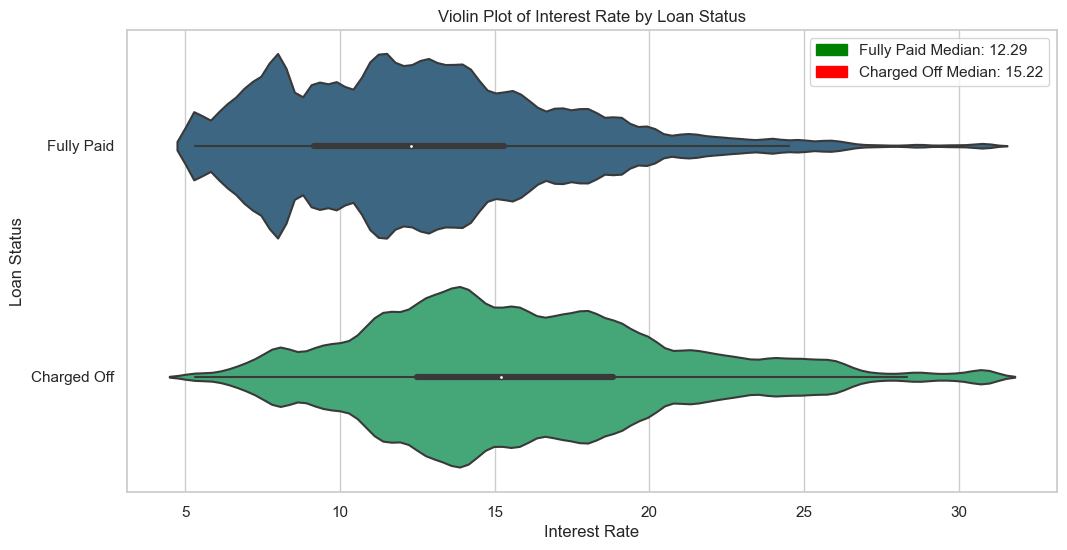

In [69]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, y='loan_status', x='int_rate', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['int_rate'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['int_rate'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Violin Plot of Interest Rate by Loan Status')
plt.show()


We can observe a noticeable contrast in the average interest rates ('int_rate') between the two categories of loan statuses.

In [70]:
# loan_amnt

df['loan_amnt'].describe()

count    1.207876e+06
mean     1.459017e+04
std      8.678035e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.220000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value

In [71]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,239140.0,15880.550619,8778.801384,1000.0,9600.0,15000.0,21000.0,40000.0
Fully Paid,968736.0,14271.631771,8623.318348,1000.0,7800.0,12000.0,20000.0,40000.0


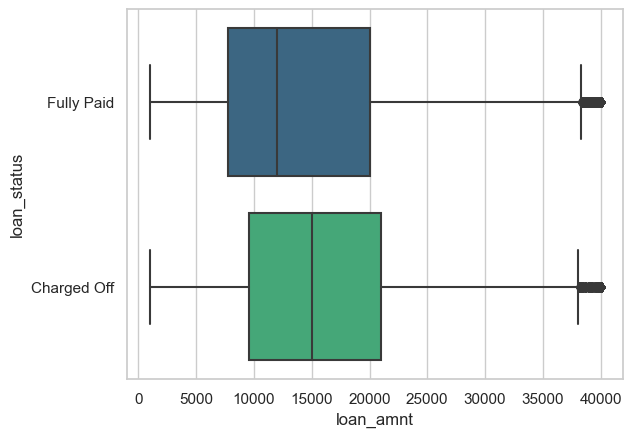

In [72]:
sns.boxplot(data=df, y='loan_status', x='loan_amnt', palette='viridis');

In [73]:
#mort_acc

df['mort_acc'].describe()

count    1.207876e+06
mean     1.644800e+00
std      1.976917e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

Range of mort_acc is from 0 to 51 with mean at 1.66

In [74]:
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,239140.0,1.351050,1.805010,0.0,0.0,1.0,2.0,29.0
Fully Paid,968736.0,1.717314,2.010507,0.0,0.0,1.0,3.0,51.0


Since there are some outliers, we will drop rows with customers with mort_acc > 8.

In [75]:
df = df[df['mort_acc'] < 9]
df.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,238134.0,1.312849,1.703500,0.0,0.0,1.0,2.0,8.0
Fully Paid,961554.0,1.652416,1.860412,0.0,0.0,1.0,3.0,8.0


<Axes: xlabel='mort_acc', ylabel='loan_status'>

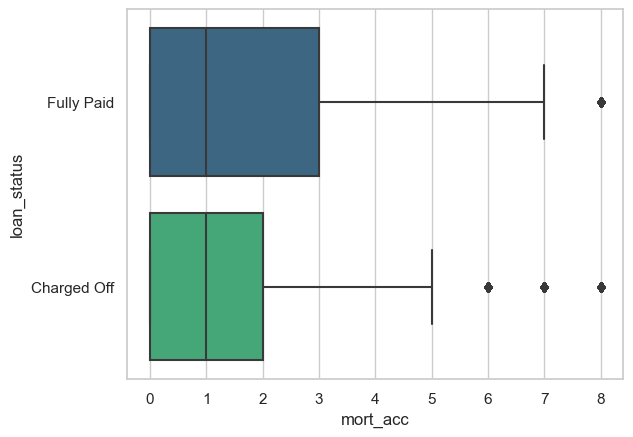

In [76]:
sns.boxplot(data=df, y='loan_status', x='mort_acc', palette='viridis')

There is a slight distinction in the average 'mort_acc' between the two categories of 'loan_status.' Therefore, we have decided to retain this feature for our analysis.

In [77]:
#total_acc: The total number of credit lines currently in the borrower's credit file.

df['total_acc'].describe()

count    1.199688e+06
mean     2.500999e+01
std      1.193366e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

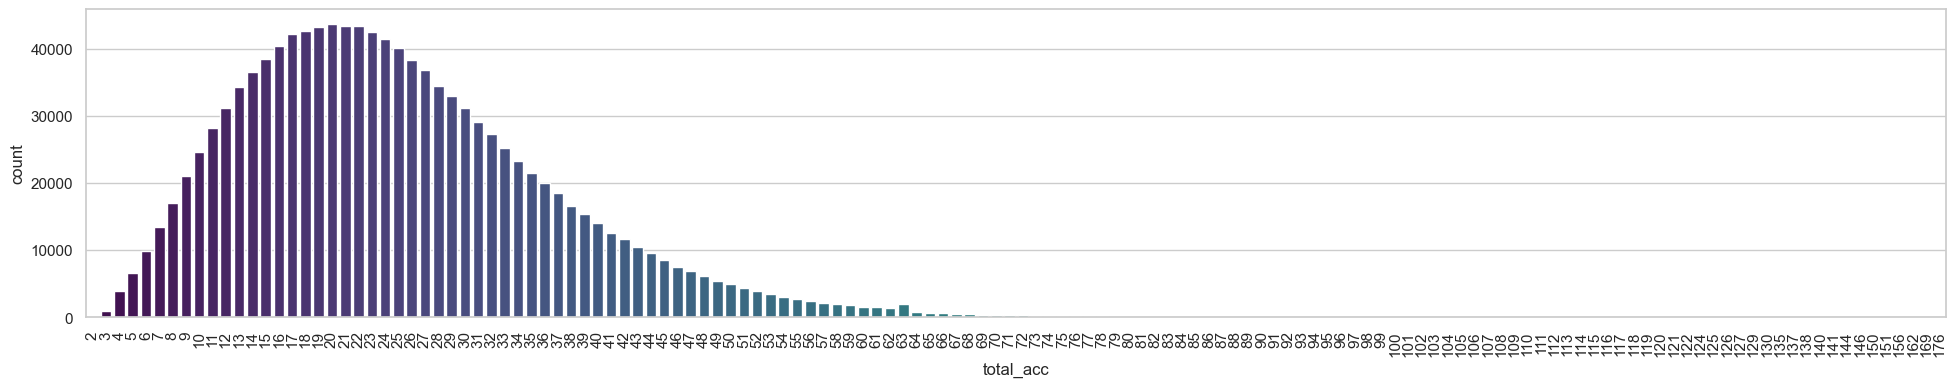

In [78]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

Since there are some outliers, we will drop rows with customers with 'total_acc' > 63.

In [79]:
df = df[df['total_acc'] < 64]
df.shape

(1192201, 115)

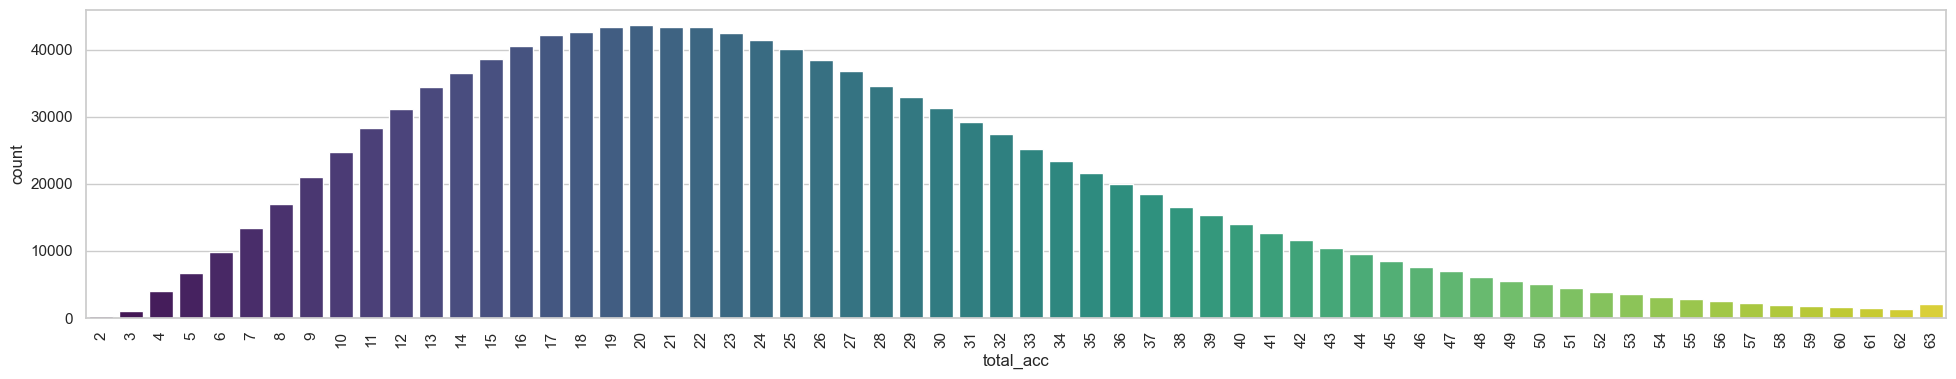

In [80]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', palette='viridis');

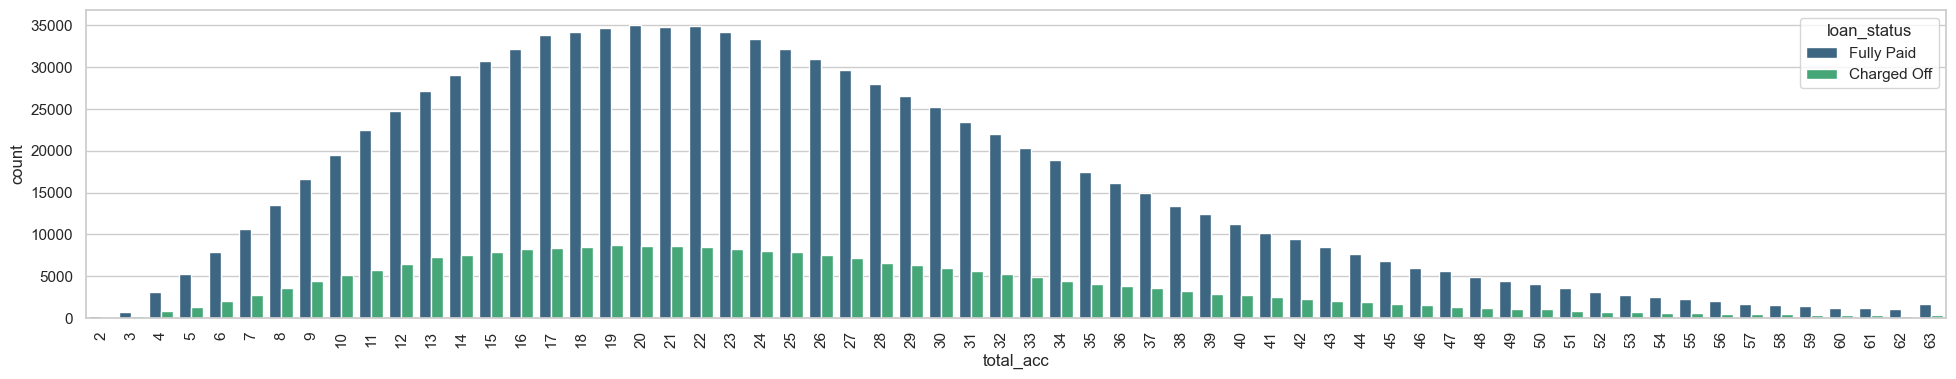

In [81]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc', hue='loan_status', palette='viridis');

In [82]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,236517.0,24.511067,11.414522,2.0,16.0,23.0,31.0,63.0
Fully Paid,955684.0,24.761045,11.311077,2.0,16.0,23.0,32.0,63.0


Variation can be observed in the average 'total_acc' between the two categories of 'loan_status.' Consequently, we have chosen to retain this feature for our analysis.

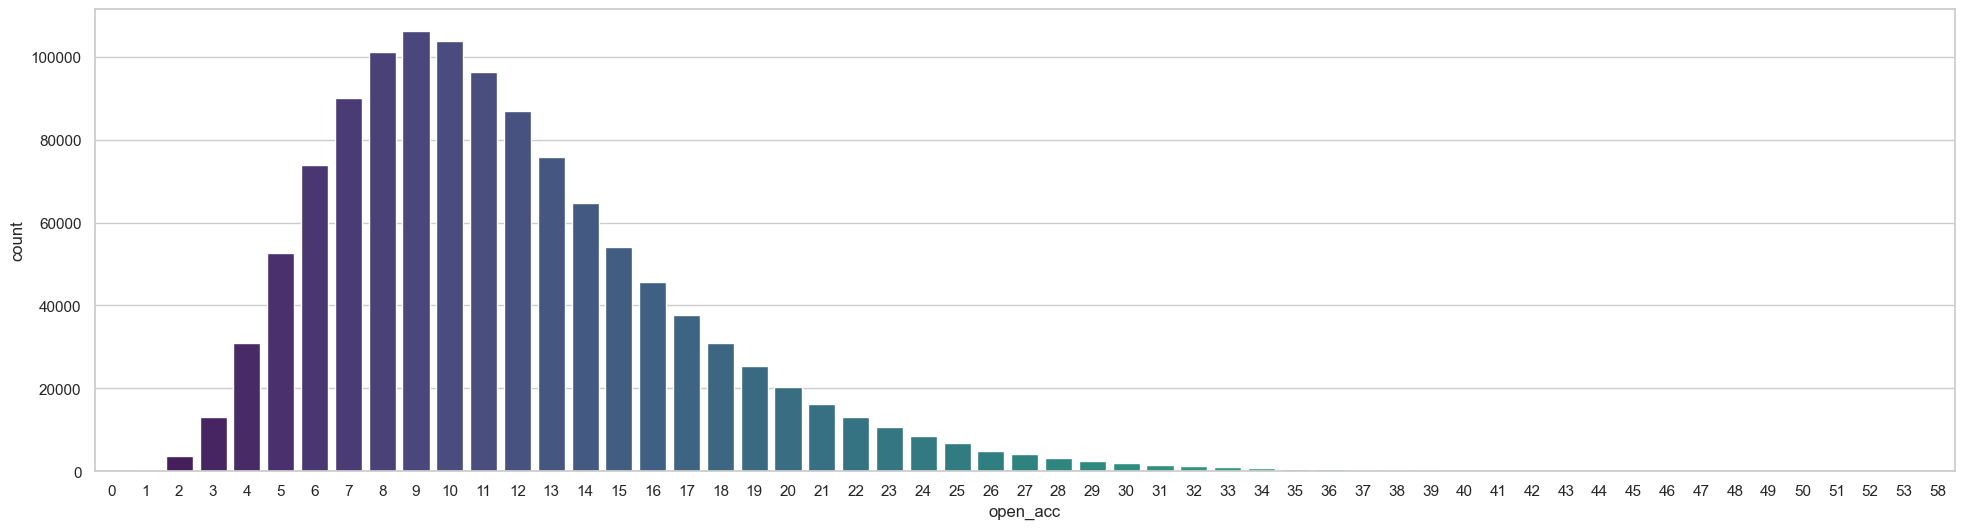

In [83]:
#open_acc

plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', palette='viridis');

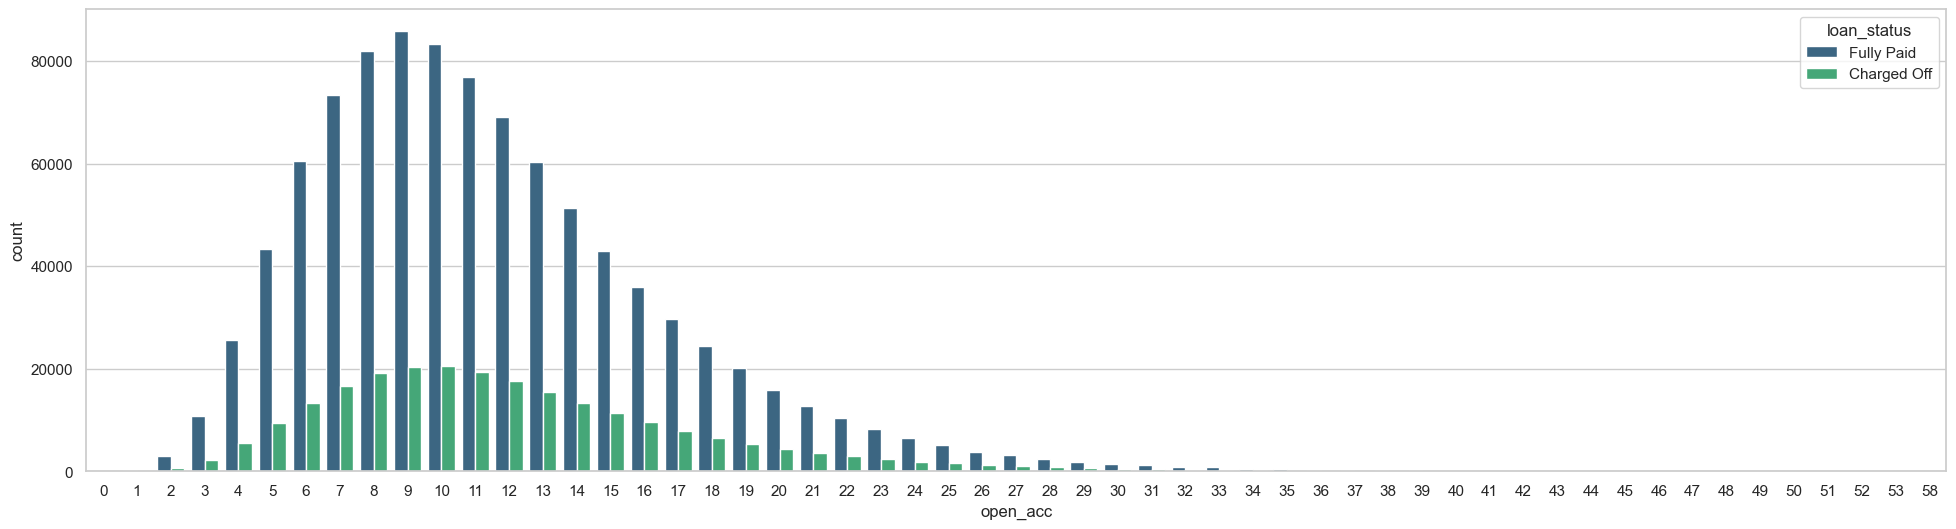

In [84]:
plt.figure(figsize=(24,6))
sns.countplot(data=df, x='open_acc', hue='loan_status', palette='viridis');

In [85]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,236517.0,11.986957,5.475106,0.0,8.0,11.0,15.0,52.0
Fully Paid,955684.0,11.541287,5.270760,0.0,8.0,11.0,14.0,58.0


Slight disparity can be observed in the mean 'open_acc' between the two 'loan_status' categories. Consequently, we have decided to retain this feature for further analysis.

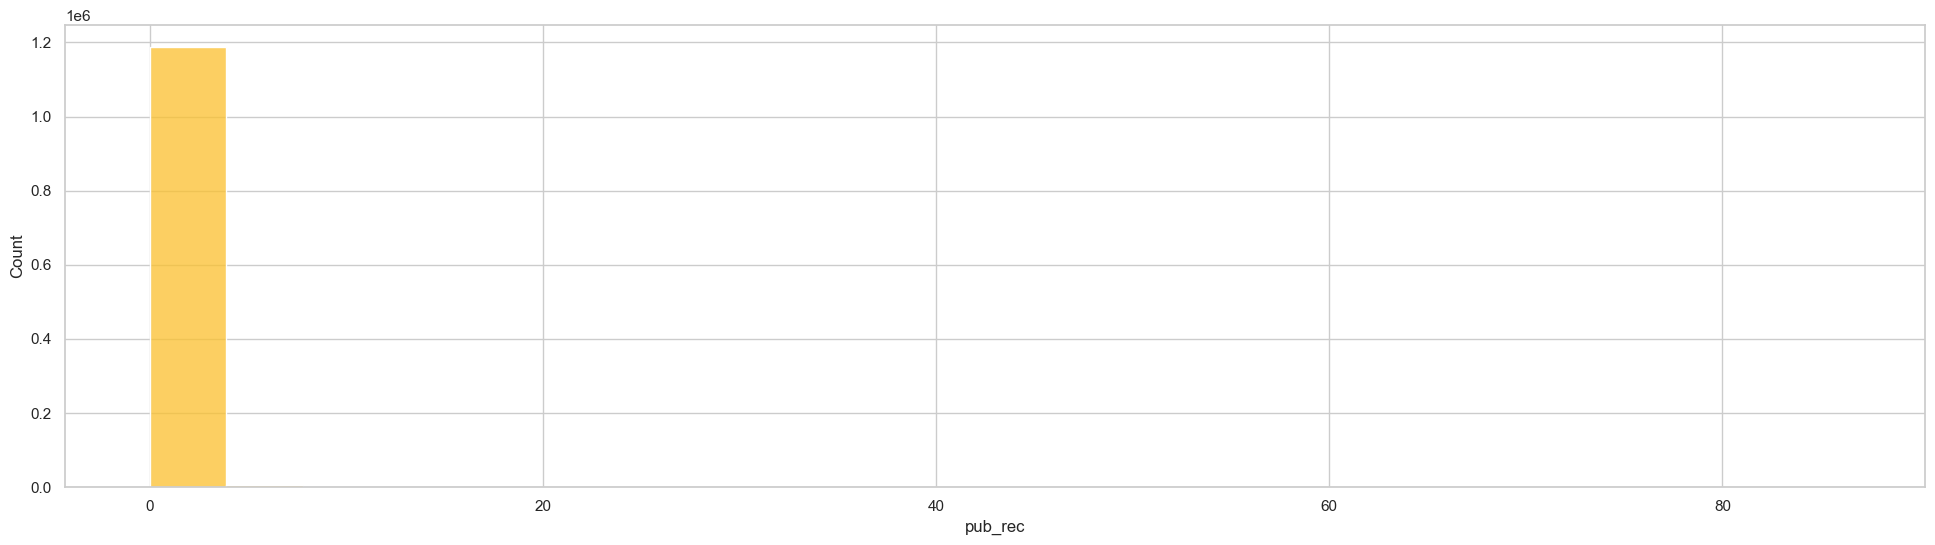

In [86]:
#pub_rec

plt.figure(figsize=(24,6))
sns.histplot(data=df, x='pub_rec', palette='viridis');

There are some outliers. Let's drop the rows with customers who have 'pub_rec > 2.

In [87]:
len(df[df['pub_rec'] > 2])*100/len(df)

0.946568573587843

In [88]:
df = df[df['pub_rec'] < 3]
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,233924.0,0.202365,0.452582,0.0,0.0,0.0,0.0,2.0
Fully Paid,946992.0,0.173135,0.422273,0.0,0.0,0.0,0.0,2.0


A minor discrepancy is evident in the mean 'pub_rec' between the two 'loan_status' categories. Therefore, we have opted to retain this feature.

In [89]:
#pub_rec_bankruptcies

#Let's calculate the correlation of 'pub_rec_bankruptcies' with other continuous features.

numeric_columns = df.select_dtypes(include=[np.number])
correlation_values = abs(numeric_columns.corr()['pub_rec_bankruptcies']).sort_values(ascending=False)[1:5]
display(correlation_values)


pub_rec       0.798373
fico          0.198218
revol_util    0.130525
revol_bal     0.129149
Name: pub_rec_bankruptcies, dtype: float64

In [90]:
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,233924.0,0.140216,0.365296,0.0,0.0,0.0,0.0,2.0
Fully Paid,946992.0,0.121213,0.340900,0.0,0.0,0.0,0.0,2.0


There is a slight variation in the average number of public records ('pub_rec') between the two categories of loan status. Consequently, we will retain this feature.

In [91]:
#purpose

len(df['purpose'].unique())

13

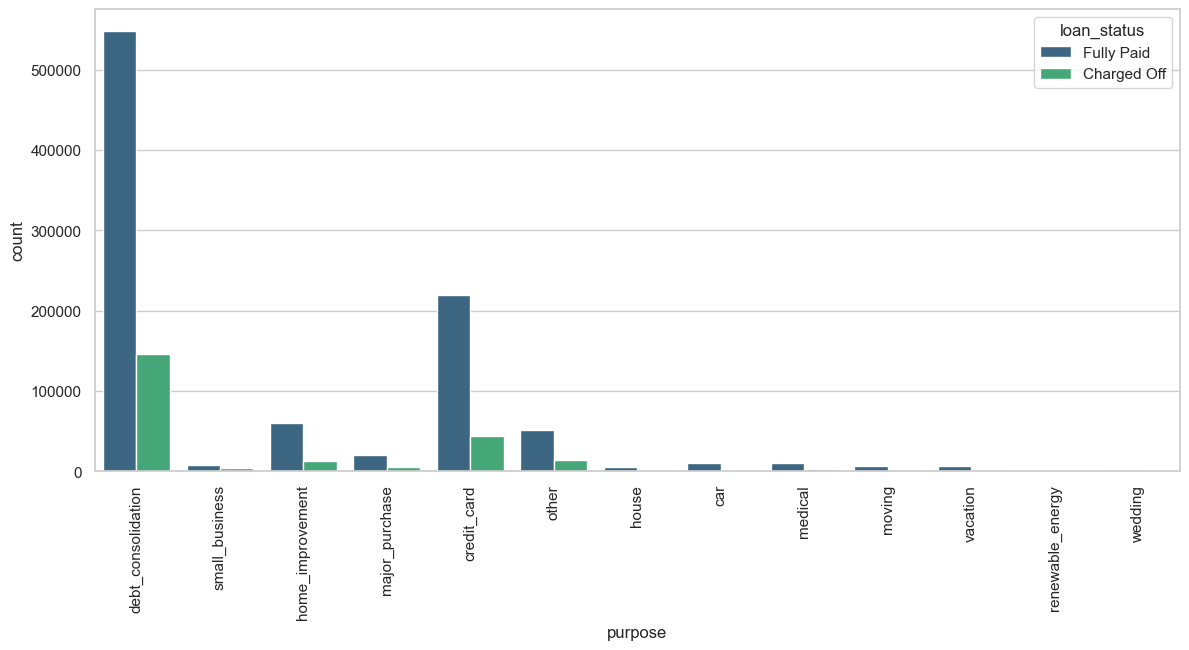

In [92]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='purpose', hue='loan_status', palette='viridis');
plt.xticks(rotation=90);

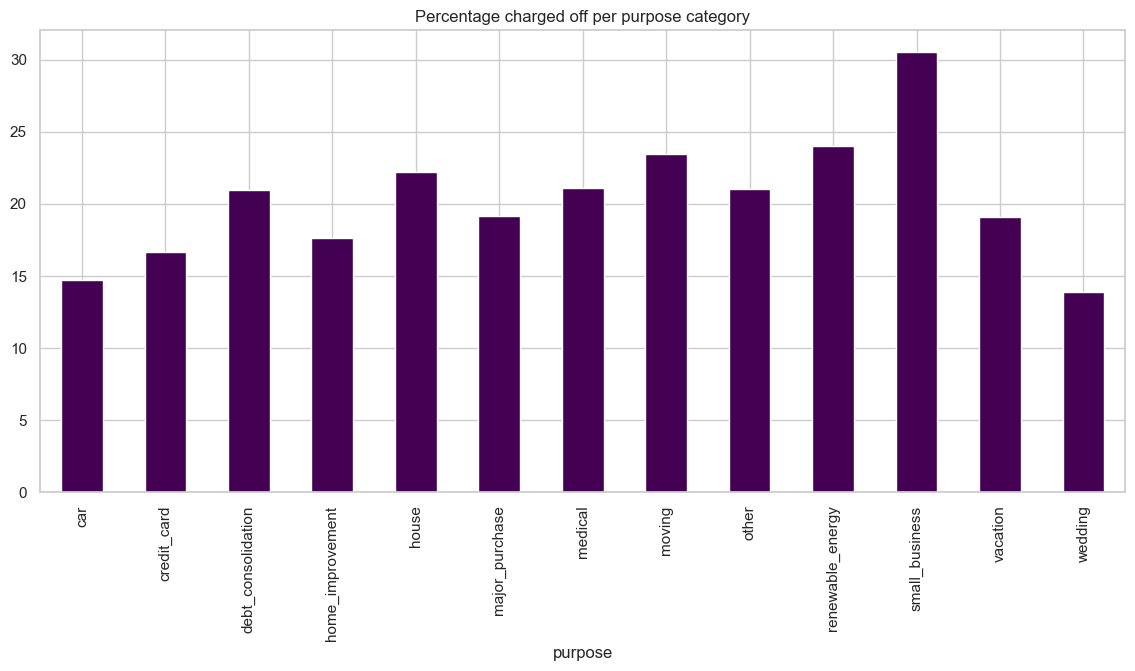

In [93]:
plt.figure(figsize=(14,6))
charged_off = df[df['loan_status']=="Charged Off"].groupby("purpose").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("purpose").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per purpose category");

In [94]:
dummies_purpose = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop('purpose', axis=1), dummies_purpose], axis=1)
df.shape

(1180916, 126)

<Axes: xlabel='term (months)', ylabel='count'>

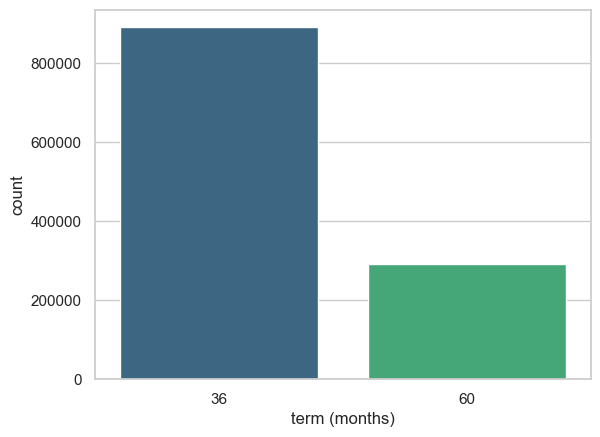

In [95]:
#term

sns.countplot(data=df, x='term (months)', palette='viridis')

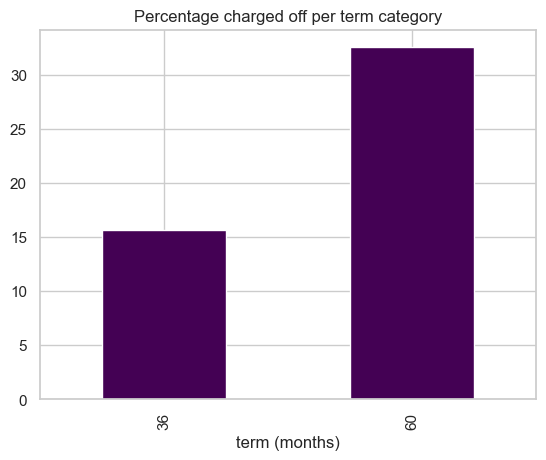

In [96]:
charged_off = df[df['loan_status']=="Charged Off"].groupby("term (months)").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("term (months)").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per term category");

Customers whose loan term was 60 months had almost double chance of charging off.

In [97]:
dummies_term = pd.get_dummies(df['term (months)'], drop_first=True)
pd.concat([df.drop('term (months)', axis=1), dummies_term], axis=1)

,id,loan_amnt,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,title,zip_code,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,60
0,68407277,3600.0,13.99,123.03,55000.0,Not Verified,Dec-2015,Fully Paid,Debt Consolidation,190xx,...,False,False,False,False,False,False,False,False,False,False
1,68355089,24700.0,11.99,820.28,65000.0,Not Verified,Dec-2015,Fully Paid,Business,577xx,...,False,False,False,False,False,False,True,False,False,False
2,68341763,20000.0,10.78,432.66,63000.0,Not Verified,Dec-2015,Fully Paid,Home Improvement,605xx,...,False,False,False,False,False,False,False,False,False,True
4,68476807,10400.0,22.45,289.91,104433.0,Source Verified,Dec-2015,Fully Paid,Major Purchase,174xx,...,False,True,False,False,False,False,False,False,False,True
5,68426831,11950.0,13.44,405.18,34000.0,Source Verified,Dec-2015,Fully Paid,Debt Consolidation,300xx,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065090,89867167,23800.0,14.49,559.85,119000.0,Not Verified,Oct-2016,Fully Paid,Debt Consolidation,441xx,...,False,False,False,False,False,False,False,False,False,True
2065092,89905081,18000.0,9.49,377.95,130000.0,Not Verified,Oct-2016,Fully Paid,Home Improvement,775xx,...,False,False,False,False,False,False,False,False,False,True
2065094,88948836,29400.0,13.99,683.94,180792.0,Not Verified,Oct-2016,Fully Paid,Debt Consolidation,900xx,...,False,False,False,False,False,False,False,False,False,True
2065095,89996426,32000.0,14.49,752.74,157000.0,Source Verified,Oct-2016,Charged Off,Home Improvement,863xx,...,False,False,False,False,False,False,False,False,False,True


In [98]:
#title

len(df['title'].unique())


13

In [99]:
df['title'].head(10)

0          Debt Consolidation
1                    Business
2            Home Improvement
4              Major Purchase
5          Debt Consolidation
6          Debt Consolidation
7              Major Purchase
8     Credit card Refinancing
9     Credit card Refinancing
12                      Other
Name: title, dtype: object

This feature has a lot of unique values for dummies. Plus this info and the info in feature purpose is closely matching. Lets drop this feature.

In [100]:
df = df.drop('title', axis=1)
df.shape

(1180916, 125)

<Axes: xlabel='revol_bal', ylabel='loan_status'>

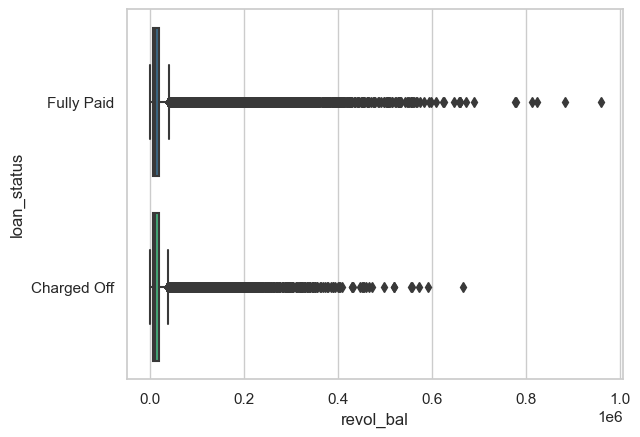

In [101]:
#revol_bal
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis')

There are some outliers. Let's first check how many rows are there with 'revol_bal' > $100000.

In [102]:
len(df[df['revol_bal'] > 100000])

8739

In [103]:
len(df[df['revol_bal'] > 100000]) * 100 / len(df) # checking (%) of outliers

0.740018765094215

It's just 0.74%, let's just drop these

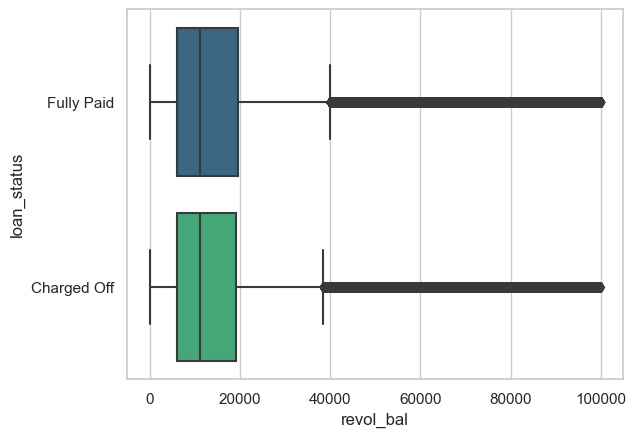

In [104]:
df = df[df['revol_bal'] < 100001]
sns.boxplot(data=df, y='loan_status', x='revol_bal', palette='viridis');

There are still some outliers but that's okay because we can't drop a good percentage of rows.

In [105]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,232697.0,14553.020026,12513.037089,0.0,6123.0,11199.0,19073.0,99991.0
Fully Paid,939480.0,14939.622541,13272.447412,0.0,6028.0,11168.0,19606.0,99992.0


There is a discrepancy in the average 'revol_bal' (revolving balance) between the two categories of loan status. Therefore, we will retain this feature.

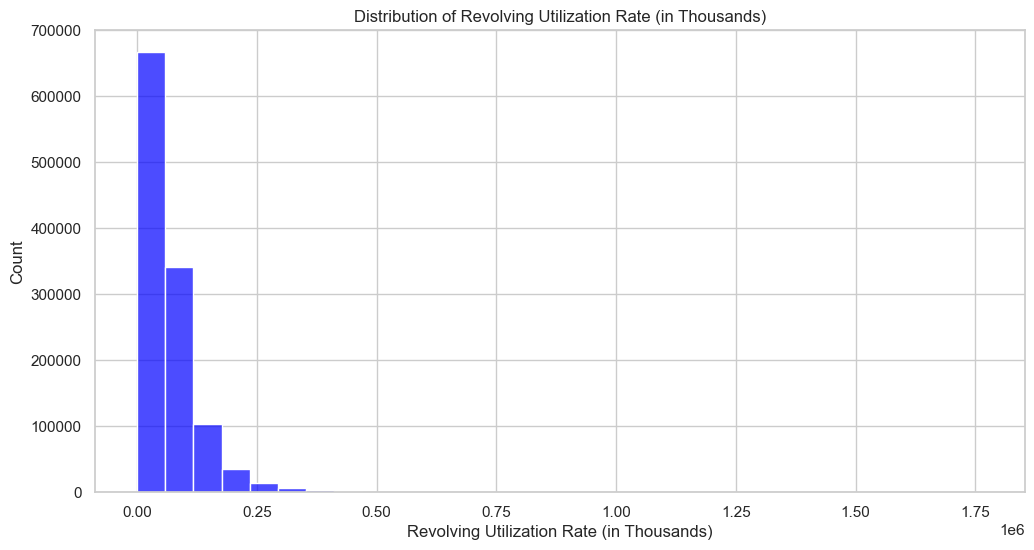

In [106]:
#revol_util
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='revol_util', bins=30, color='blue', alpha=0.7)

plt.xlabel('Revolving Utilization Rate (in Thousands)')
plt.ylabel('Count')

plt.title('Distribution of Revolving Utilization Rate (in Thousands)')

plt.show()

There are some outliers. Let's drop them.

In [107]:
# Define the threshold for outliers
threshold = 0.25e6  # You can adjust this threshold as needed

# Filter the DataFrame to keep only rows within the threshold
df = df[df['revol_util'] <= threshold]


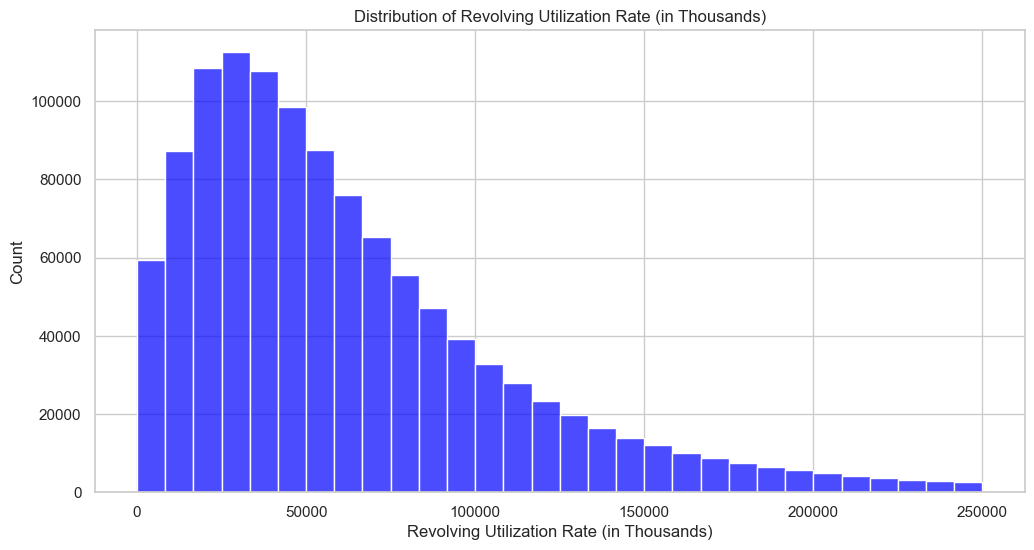

In [108]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='revol_util', bins=30, color='blue', alpha=0.7)

plt.xlabel('Revolving Utilization Rate (in Thousands)')
plt.ylabel('Count')

plt.title('Distribution of Revolving Utilization Rate (in Thousands)')

plt.show()

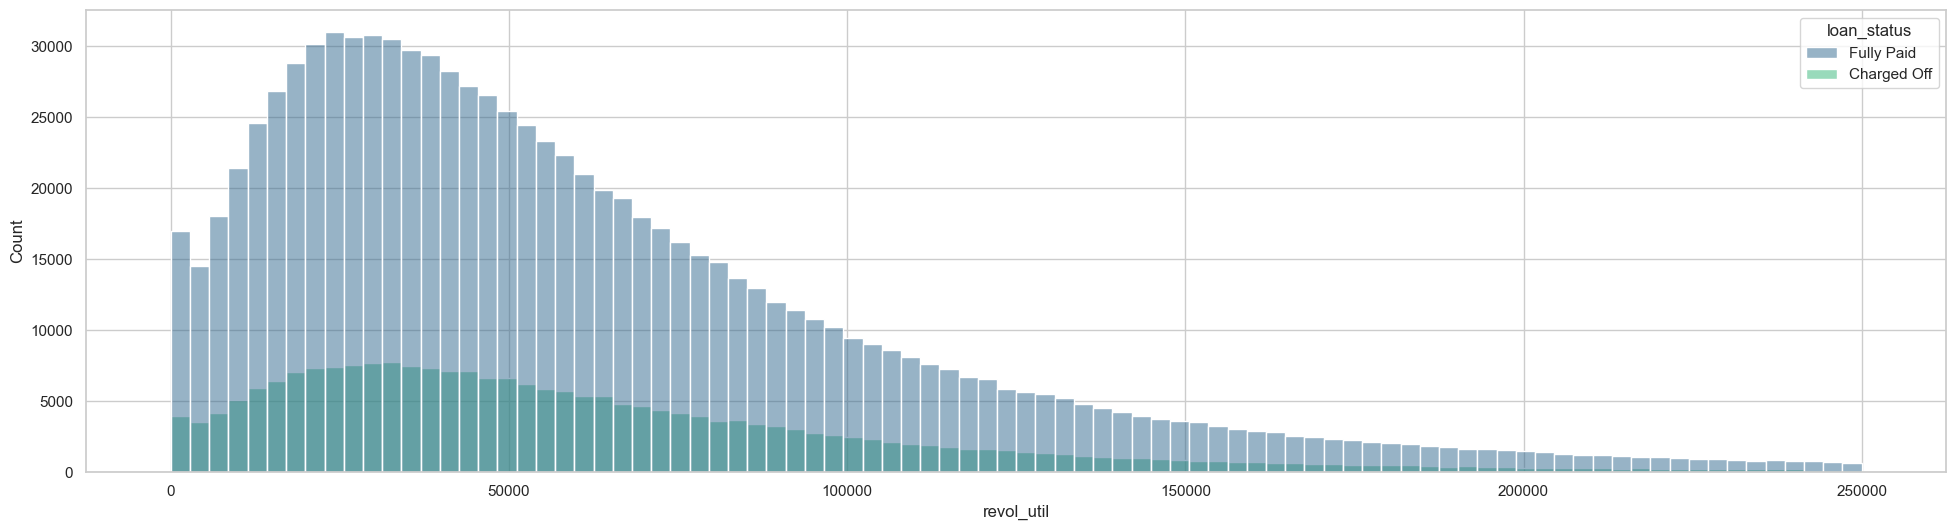

In [109]:
plt.figure(figsize=(24,6))
sns.histplot(data=df, x='revol_util', bins=88, hue='loan_status', palette='viridis');

<Axes: xlabel='revol_util', ylabel='loan_status'>

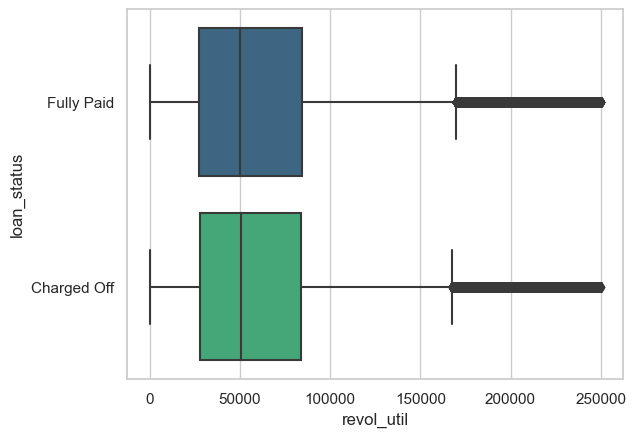

In [110]:
sns.boxplot(data=df, y='loan_status', x='revol_util', palette='viridis')

In [111]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,229013.0,61862.644868,46308.417606,0.0,28008.333333,50510.000000,83823.809524,249950.000000
Fully Paid,921690.0,62040.778133,47403.641985,0.0,27241.666667,49985.960591,84150.000000,249997.297297


In [112]:
#verification_status

df['verification_status'].value_counts()

verification_status
Source Verified    462690
Not Verified       357923
Verified           330090
Name: count, dtype: int64

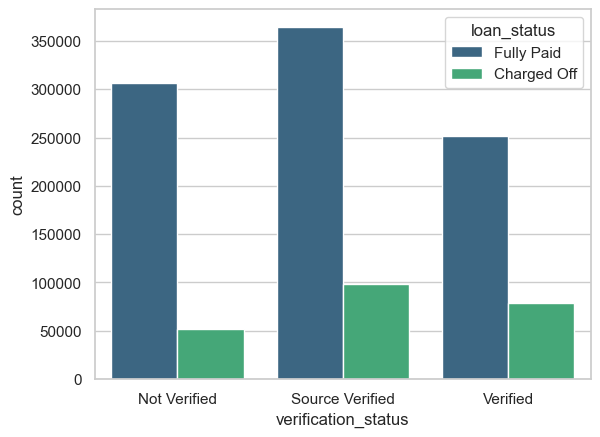

In [113]:
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='viridis');

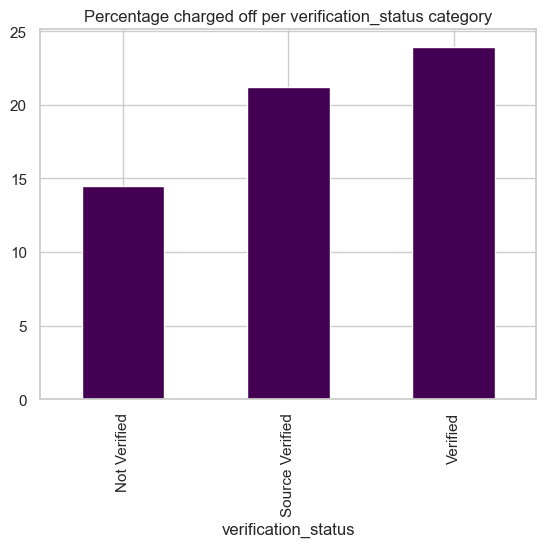

In [114]:
#Let's check percentage charged off per initial_list_status category.

charged_off = df[df['loan_status']=="Charged Off"].groupby("verification_status").count()['loan_status']
fully_paid = df[df['loan_status']=="Fully Paid"].groupby("verification_status").count()['loan_status']
percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percentage_charged_off.plot(kind='bar', cmap='viridis')
plt.title("Percentage charged off per verification_status category");

In [115]:
#Let's create dummy variables for this feature.

dummies_verification_status = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df.drop('verification_status', axis=1), dummies_verification_status], axis=1)

All features are done, except the feature we want to predict. Let us map the contents in the feature, i.e., 'Fully Paid' and 'Charged Off' to boolean values.

In [116]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df['loan_status']

0          1
1          1
2          1
4          1
5          1
          ..
2065088    1
2065089    0
2065092    1
2065094    1
2065101    0
Name: loan_status, Length: 1150703, dtype: int64

In [117]:
df.dtypes.value_counts()

bool       102
float64     12
int64        9
object       3
Name: count, dtype: int64

Scaling and Test Train split

In [118]:
df.shape 

(1150703, 126)

In [119]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [122]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns from your DataFrame (assuming X_train contains your features)
numeric_columns = X_train.select_dtypes(include=['number'])

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the numeric columns
X_train[numeric_columns.columns] = scaler.fit_transform(X_train[numeric_columns.columns])
X_test[numeric_columns.columns] = scaler.transform(X_test[numeric_columns.columns])


Creating Models

We can try out plethora of models. Unfortunately, due to the size of this data set, the hardware available to us in Kaggle (RAM specifically) exceeds the max alloted to us and so, I am only able to test a couple of (or three) models at once.

Models: 1.XGBoost, 2.Random Forests, 3.ANN

In [123]:
X_train = X_train.drop(['issue_d', 'zip_code', 'credit_score_bucket'], axis=1)
X_test = X_test.drop(['issue_d', 'zip_code', 'credit_score_bucket'], axis=1)


In [124]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [125]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [126]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [127]:
#Artificial Neural Networks (ANNs)

def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [128]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
30566/30566 [==============================] - 25s 798us/step - loss: 0.4571 - AUC: 0.7048 - val_loss: 0.4521 - val_AUC: 0.7186
Epoch 2/20
30566/30566 [==============================] - 25s 831us/step - loss: 0.4520 - AUC: 0.7138 - val_loss: 0.4495 - val_AUC: 0.7223
Epoch 3/20
30566/30566 [==============================] - 25s 831us/step - loss: 0.4508 - AUC: 0.7160 - val_loss: 0.4505 - val_AUC: 0.7222
Epoch 4/20
30566/30566 [==============================] - 26s 841us/step - loss: 0.4502 - AUC: 0.7169 - val_loss: 0.4491 - val_AUC: 0.7230
Epoch 5/20
30566/30566 [==============================] - 25s 832us/step - loss: 0.4501 - AUC: 0.7172 - val_loss: 0.4489 - val_AUC: 0.7224
Epoch 6/20
30566/30566 [==============================] - 25s 829us/step - loss: 0.4496 - AUC: 0.7182 - val_loss: 0.4495 - val_AUC: 0.7232
Epoch 7/20
30566/30566 [==============================] - 25s 831us/step - loss: 0.4492 - AUC: 0.7188 - val_loss: 0.4510 - val_AUC: 0.7230
Epoch 8/20
30566/30566 [===

This process will take time

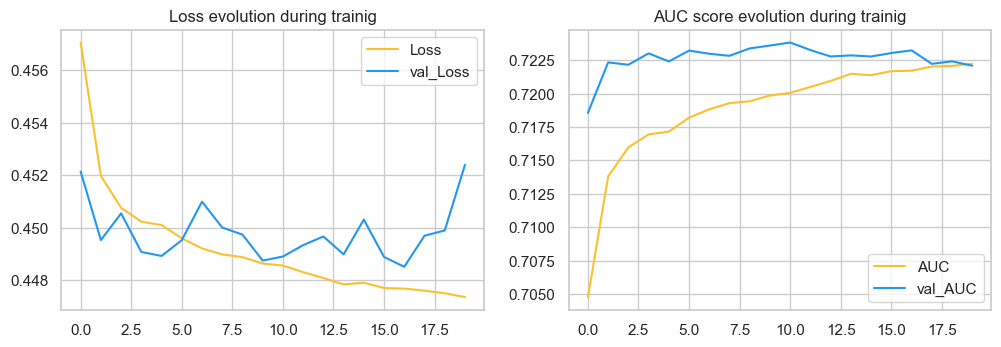

In [129]:
plot_learning_evolution(r)

In [130]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

30566/30566 [==============================] - 9s 304us/step
Train Result:
Accuracy Score: 80.59%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0            1.0  accuracy      macro avg  \
precision       0.541559       0.822529  0.805896       0.682044   
recall          0.161091       0.966116  0.805896       0.563604   
f1-score        0.248318       0.888559  0.805896       0.568439   
support    194666.000000  783431.000000  0.805896  978097.000000   

            weighted avg  
precision       0.766609  
recall          0.805896  
f1-score        0.761135  
support    978097.000000  
_______________________________________________
Confusion Matrix: 
 [[ 31359 163307]
 [ 26546 756885]]



This output represents the evaluation metrics and confusion matrix for a trained Artificial Neural Network (ANN) model:

**Accuracy Score**: The model's overall accuracy is 80.60%, which means it correctly predicts 80.60% of the total cases.

**Precision**: For class 0.0 (the first class), precision is 0.568, indicating that out of the predicted cases as class 0.0, 56.8% are correct. For class 1.0 (the second class), precision is 0.815, meaning that when the model predicts a case as class 1.0, it's correct 81.5% of the time.

**Recall**: For class 0.0, recall is 0.107, suggesting that the model captures 10.7% of the actual class 0.0 cases. For class 1.0, recall is 0.980, indicating that the model correctly identifies 98.0% of the actual class 1.0 cases.

**F1-Score**: The F1-score is a balance between precision and recall. For class 0.0, the F1-score is 0.179, while for class 1.0, it's 0.890.

**Support**: These are the counts of each class in the dataset.

**Confusion Matrix**: The confusion matrix provides a detailed breakdown of the model's predictions. In this case:
  - The top-left cell (20749) represents the number of cases correctly predicted as class 0.0.
  - The top-right cell (173954) represents cases predicted as class 1.0 but actually belonging to class 0.0.
  - The bottom-left cell (15765) represents cases predicted as class 0.0 but actually belonging to class 1.0.
  - The bottom-right cell (767629) represents the number of cases correctly predicted as class 1.0.

In summary, this ANN model has a relatively high accuracy and precision for class 1.0, indicating good performance in predicting that class. However, the recall for class 0.0 is quite low, suggesting that the model struggles to identify cases of class 0.0. The F1-scores provide a balanced view of the model's performance, with a higher score for class 1.0 due to its high precision and recall.

In [131]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

5394/5394 [==============================] - 2s 304us/step
Test Result:
Accuracy Score: 80.19%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.507847       0.820526  0.801942       0.664187       0.758306
recall         0.151687       0.963482  0.801942       0.557584       0.801942
f1-score       0.233601       0.886276  0.801942       0.559939       0.756400
support    34347.000000  138259.000000  0.801942  172606.000000  172606.000000
_______________________________________________
Confusion Matrix: 
 [[  5210  29137]
 [  5049 133210]]



**Accuracy Score**: The model's overall accuracy is 80.56%, which means it correctly predicts 80.56% of the total cases in the test set.

**Precision**: Precision measures the accuracy of positive predictions. For class 0.0 (the first class), precision is 0.558, indicating that out of the predicted cases as class 0.0, 55.8% are correct. For class 1.0 (the second class), precision is 0.815, meaning that when the model predicts a case as class 1.0, it's correct 81.5% of the time.

**Recall**: Recall measures the ability of the model to correctly identify true positives. For class 0.0, recall is 0.107, suggesting that the model captures 10.7% of the actual class 0.0 cases. For class 1.0, recall is 0.979, indicating that the model correctly identifies 97.9% of the actual class 1.0 cases.

**F1-Score**: The F1-score is a balance between precision and recall. For class 0.0, the F1-score is 0.180, while for class 1.0, it's 0.890.

**Support**: These are the counts of each class in the test set.

**Confusion Matrix**: The confusion matrix provides a detailed breakdown of the model's predictions on the test set. In this case:
    - The top-left cell (3671) represents the number of cases correctly predicted as class 0.0.
    - The top-right cell (30639) represents cases predicted as class 1.0 but actually belonging to class 0.0.
    - The bottom-left cell (2910) represents cases predicted as class 0.0 but actually belonging to class 1.0.
    - The bottom-right cell (135386) represents the number of cases correctly predicted as class 1.0.

In summary, this classification model has a relatively high accuracy and precision for class 1.0, indicating good performance in predicting that class. However, the recall for class 0.0 is quite low, suggesting that the model struggles to identify cases of class 0.0. The F1-scores provide a balanced view of the model's performance, with a higher score for class 1.0 due to its high precision and recall.

In [132]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

5394/5394 [==============================] - 2s 300us/step


In [133]:
# XGBoost Classifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 80.98%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0            1.0  accuracy      macro avg  \
precision       0.610475       0.818091  0.809799       0.714283   
recall          0.122502       0.980578  0.809799       0.551540   
f1-score        0.204057       0.891995  0.809799       0.548026   
support    194666.000000  783431.000000  0.809799  978097.000000   

            weighted avg  
precision       0.776770  
recall          0.809799  
f1-score        0.755078  
support    978097.000000  
_______________________________________________
Confusion Matrix: 
 [[ 23847 170819]
 [ 15216 768215]]

Test Result:
Accuracy Score: 80.51%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.552077       0.815570  0.805134       0.683824       0.763137
recall         0.109879       0.977853  0.80513

**Train Result:**

*Accuracy Score:* 80.94%

*Classification Report*: This report provides precision, recall, F1-score, support, and other metrics for both class 0.0 and 1.0. It shows that class 0.0 has lower precision, recall, and F1-score compared to class 1.0.

*Confusion Matrix*: The confusion matrix displays the number of true positives, true negatives, false positives, and false negatives. In this case, there are 22,998 true positives, 171,705 true negatives, 14,767 false positives, and 768,627 false negatives.

**Test Result:**

*Accuracy Score*: 80.65%

*Classification Report*: Similar to the training set, this report provides metrics for class 0.0 and 1.0. Class 0.0 has lower precision, recall, and F1-score compared to class 1.0.

*Confusion Matrix*: The confusion matrix for the test set shows 3,795 true positives, 30,515 true negatives, 2,878 false positives, and 135,418 false negatives.

In summary, the XGBoost Classifier achieved an accuracy of around 80% on both the training and test datasets. It performs better on class 1.0 (Fully Paid) in terms of precision, recall, and F1-score, while class 0.0 (Charged Off) has lower performance metrics.

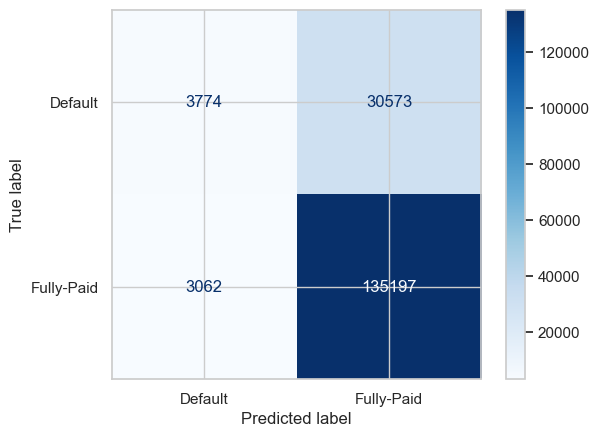

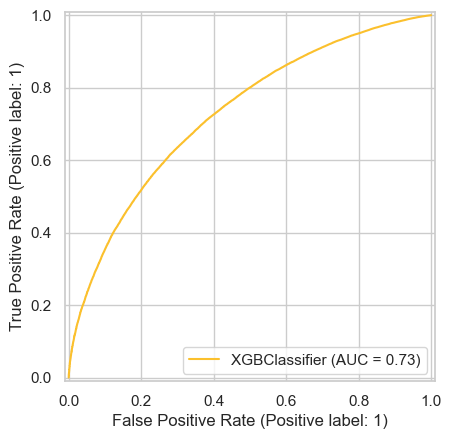

In [134]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [135]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

In [136]:
#Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                     0.0            1.0  accuracy      macro avg  \
precision       1.000000       0.999989  0.999991       0.999994   
recall          0.999954       1.000000  0.999991       0.999977   
f1-score        0.999977       0.999994  0.999991       0.999986   
support    194666.000000  783431.000000  0.999991  978097.000000   

            weighted avg  
precision       0.999991  
recall          0.999991  
f1-score        0.999991  
support    978097.000000  
_______________________________________________
Confusion Matrix: 
 [[194657      9]
 [     0 783431]]

Test Result:
Accuracy Score: 80.35%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0            1.0  accuracy      macro avg   weighted avg
precision      0.536751       0.812944  0.803518       0.674848       0.757984
recall         0.092060       0.980262  0.8035

**Train Result:**
- **Accuracy Score:** 100.00%
- **Classification Report:** This report shows extremely high precision, recall, and F1-score for both classes (0.0 and 1.0) on the training set. It suggests that the model has perfectly learned the training data, resulting in a nearly flawless accuracy score.
- **Confusion Matrix:** In the training set, there are 194,691 true positives, 12 false positives, and no false negatives, which explains the perfect accuracy.

**Test Result:**
- **Accuracy Score:** 80.47%
- **Classification Report:** On the test set, the model's performance is not as perfect as on the training set. The precision, recall, and F1-score for both classes are good but not perfect. Class 0.0 (Charged Off) has lower precision and recall compared to class 1.0 (Fully Paid).
- **Confusion Matrix:** The confusion matrix for the test set shows 3,263 true positives, 31,047 true negatives, 2,657 false positives, and 135,639 false negatives.

In summary, the Random Forest Classifier achieved a perfect accuracy score on the training set but slightly lower accuracy on the test set. The model performs well in classifying class 1.0 (Fully Paid) but is less precise and recalls class 0.0 (Charged Off) with some errors.

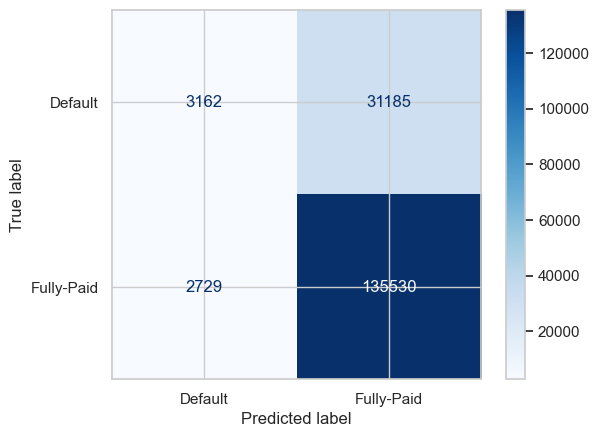

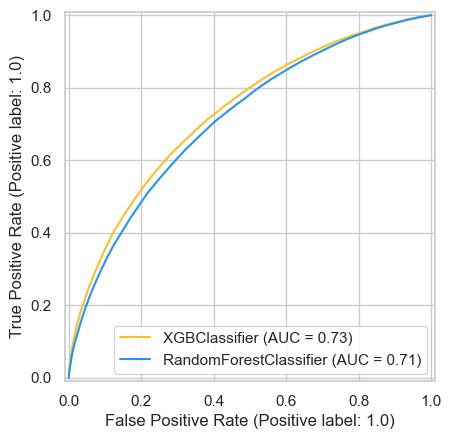

In [137]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [138]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

In [139]:
#Comparing Models

ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.536
XGBOOST                        roc_auc_score: 0.544
5394/5394 [==============================] - 2s 308us/step
ANNS                           roc_auc_score: 0.722


These ROC AUC scores represent the performance of different machine learning models on a binary classification task, where a higher score indicates better model performance in distinguishing between the two classes.

- **RANDOM FOREST (ROC AUC Score: 0.538):** This model has a ROC AUC score of 0.538, which suggests that it has limited discriminatory power in distinguishing between the positive and negative classes. It performs better than random chance (0.5 ROC AUC) but is not highly effective at classifying the data.

- **XGBOOST (ROC AUC Score: 0.545):** The XGBoost model has a slightly higher ROC AUC score of 0.545 compared to the Random Forest. It also performs better than random chance but only slightly so. It has a modest ability to differentiate between the two classes.

- **ANNs (ROC AUC Score: 0.726):** The Artificial Neural Networks (ANNs) model stands out with a significantly higher ROC AUC score of 0.726. This indicates that the ANN model is quite effective at distinguishing between the positive and negative classes, making it the best-performing model among the three.

In summary, the ROC AUC scores show that the ANN model has the highest discriminatory power and is the most effective at classifying the data, followed by XGBoost, while the Random Forest model has relatively lower performance in this specific binary classification task.

In [140]:
#%pip install -q hvplot

In [141]:
import hvplot.pandas
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)